# **Celestial Object Detection**
#### Multi-class classification of astronomical objects into **Stars, Galaxies or Quasars**, 
#### based on spectroscopic & photometric features made available as a tabular dataset.

____

**Note:** Large image size - ***Do not*** click on the image as the text backend may take considerable time to load

<img src="https://cdn.pixabay.com/photo/2016/11/21/12/39/stars-1845140_960_720.jpg"></img>

**Source:** [Pixabay](https://pixabay.com/photos/stars-sky-night-starry-sky-1845140/)

**Note:** While we have seen machine learning techniques applied to various problem contexts from the business domain as part of the case studies so far, this case study aims to demonstrate their applicability to problem statements from the natural sciences as well. 

Astronomy is one such discipline with an abundance of vast datasets, and machine learning algorithms are sometimes a necessity due to the labor intensity of analyzing all this data and deriving insights and conclusions in a more manual fashion.

## **Problem Context**

The detection of celestial objects observed through telescopes as being either a star, a galaxy or a quasar, is an important classification scheme in astronomy. Stars have been known to humanity since time immemorial, but the idea of the existence of whole galaxies of stars outside our own galaxy (The Milky Way), was first theorized by the philosopher Immanuel Kant in 1755, and conclusively observed in 1925 by the American astronomer Edwin Hubble. Quasars have been a more recent discovery made possible significantly by the emergence of radio astronomy in the 1950s. 

Descriptions of these three celestial objects are provided below:

- **Star:** A star is an astronomical object consisting of a luminous plasma spheroid held together by the force of its own gravity. The nuclear fusion reactions taking place at a star's core are exoergic (there is a net release of energy) and are hence responsible for the light emitted by the star. The closest star to Earth is, of course, the Sun. The next nearest star is Proxima Centauri, which is around 4.25 light years away (a light year refers to the unit of distance travelled by light in one year, around 9.46 trillion kilometers). Several stars are visible to us in the night sky, however they are so far away they appear as mere points of light to us here on Earth. There are an estimated 10<sup>22</sup> to 10<sup>24</sup> stars in the observable universe, but the only ones visible to the unaided eye are those in the Milky Way, our home galaxy. 

- **Galaxy:** Galaxies are gravitationally bound groupings or systems of stars that additionally contain other matter such as stellar remnants, interstellar gas, cosmic dust and even dark matter. Galaxies may contain anywhere between the order of 10<sup>8</sup> to 10<sup>14</sup> stars, which orbit the center of mass of the galaxy.

- **Quasar:** Quasars, also called Quasi-stellar objects (abbv. QSO) are a kind of highly luminous "Active Galactic Nucleus". Quasars emit an enormous amount of energy, because they have supermassive black holes at their center. (A black hole is an astronomical object whose gravitational pull is so strong that not even light can escape from it if closer than a certain distance from it) The gravitational pull of the black holes causes gas to spiral and fall into "accretion discs" around the black hole, hence emitting energy in the form of electromagnetic radiation. 

Quasars were understood to be different from other stars and galaxies, because their spectral measurements (which indicated their chemical composition) and their luminosity changes were strange and initially defied explanation based on conventional knowledge - they were observed to be far more luminous than galaxies, but also far more compact, indicating tremendous power density. However, also crucially, it was the extreme "redshift" observed in the spectral readings of Quasars that stood out and gave rise to the realization that they were separate entities from other, less luminous stars and galaxies.

**Note:** In astronomy, **redshift** refers to an increase in wavelength, and hence decrease in energy/frequency of any observed electromagnetic radiation, such as light. The loss of energy of the radiation due to some factor is the key reason behind the observed redshift of that radiation. Redshift is a specific example of what's called the **Doppler Effect** in Physics. 

An everyday example of the Doppler Effect is the change in the wailing sound of the siren of an ambulance as it drives further away from us - when the ambulance is driving away from us, it feels as if the sound of the siren falls in pitch, in comparison to the higher pitched sound when the ambulance was initially driving towards us before passing our position.  

While redshift may occur for relativistic or gravitational reasons, the most significant reason for redshift of any sufficiently-far astronomical object is that **the universe is expanding** - this causes the radiation to travel a greater distance through the expanding space and hence lose energy.

For cosmological reasons, quasars are more common in the early universe, which is the part of the observable universe that is furthest away from us here on earth. It is also known from astrophysics (and attributed to the existence of "dark energy" in the universe) that **not only is the universe expanding, but the further an astronomical object is, the faster it appears to be receding away from Earth** (similar to points on an expanding balloon), and this causes the redshift of far-away galaxies and quasars to be much higher than that of galaxies closer to Earth. 

**This high redshift is one of the defining traits of Quasars**, as we will see from the insights in this case study.

## **Problem Statement**

The objective of the problem is to use the tabular features available to us about every astronomical object, to **predict whether the object is a star, a galaxy or a quasar**, through the use of supervised machine learning methods. 

In this notebook, we will use simple non-linear methods such as **k-Nearest Neighbors and Decision Trees** to perform this classification.

## **Data Description**

The source for this dataset is the **Sloan Digital Sky Survey (SDSS)**, one of the most comprehensive public sources of astronomical datasets available on the web today. SDSS has been one of the most successful surveys in astronomy history, having created highly detailed three-dimensional maps of the universe and curated spectroscopic and photometric information on over three million astronomical objects in the night sky. SDSS uses a dedicated 2.5 m wide-angle optical telescope which is located at the **Apache Point Observatory** in New Mexico, USA. 

The survey was named after the Alfred P. Sloan Foundation (established by Alfred P. Sloan, ex-president of General Motors), a major donor to this initiative and among others, the MIT Sloan School of Management.

The following dataset consists of 250,000 celestial object observations taken by SDSS. Each observation is described by 17 feature columns and 1 class column that identifies the real object to be one of **a star, a galaxy or a quasar.**

- **objid** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

- **u** = Ultraviolet filter in the photometric system
- **ra** = Right Ascension angle (at J2000 epoch)
- **dec** = Declination angle (at J2000 epoch)
- **g** = Green filter in the photometric system
- **r** = Red filter in the photometric system
- **i** = Near-Infrared filter in the photometric system
- **z** = Infrared filter in the photometric system
- **run** = Run Number used to identify the specific scan
- **rerun** = Rerun Number to specify how the image was processed
- **camcol** = Camera column to identify the scanline within the run
- **field** = Field number to identify each field
- **specobjid** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
- **class** = object class (galaxy, star, or quasar object)
- **redshift** = redshift value based on the increase in wavelength
- **plate** = plate ID, identifies each plate in SDSS
- **mjd** = Modified Julian Date used to indicate when a given piece of SDSS data was taken
- **fiberid** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


## **Importing the libraries required**

In [4]:
# Importing the basic libraries we will require for the project

import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import csv,json;
import os;

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn import tree;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV;
from sklearn.metrics import recall_score, roc_curve, classification_report, confusion_matrix;
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder;
from sklearn.compose import ColumnTransformer;
from sklearn.impute import SimpleImputer;
from sklearn.pipeline import Pipeline;
from sklearn import metrics, model_selection;

# Setting the random seed to 1 for reproducibility of results
import random;
random.seed(1);
np.random.seed(1);

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [5]:
# Uncomment if you are using google colab
# from google.colab import drive
# drive.mount('/content/drive')

# os.chdir("/content/drive/MyDrive")

## **Loading the dataset**

In [6]:
df_astro = pd.read_csv('Skyserver250k.csv');

In [7]:
df_astro.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237661976015274033,196.362072,7.667016,19.32757,19.20759,19.16249,19.07652,18.86196,3842,301,4,102,2020027785916999680,QSO,1.984419,1794,54504,594
1,1237661362373066810,206.614664,45.924279,18.95918,17.09173,16.25019,15.83413,15.55686,3699,301,5,121,1649585252231833600,GALAXY,0.064456,1465,53082,516
2,1237661360767238272,220.294728,40.894575,17.75587,16.54700,16.67694,16.77780,16.88097,3699,301,2,194,3812387877359296512,STAR,-0.000509,3386,54952,330
3,1237665440983416884,206.315349,27.438152,19.29195,19.12720,19.03992,18.76714,18.73874,4649,301,2,152,6762291282364878848,QSO,1.882893,6006,56105,496
4,1237665531717812262,228.092653,20.807371,19.19731,18.26143,17.89954,17.76130,17.68726,4670,301,3,201,4454292673071960064,STAR,-0.000295,3956,55656,846


In [8]:
df_astro.shape

(250000, 18)

- This dataset has **250,000 rows and 18 columns**.
- The dataset is quite voluminous, and has a high rows-to-columns ratio. This is quite **typical of astronomical datasets**, due to the vast number of celestial objects in the universe that can be detected today by modern telescopes and observatories.

In [9]:
df_astro['class'].value_counts()

class
GALAXY    127117
STAR       96116
QSO        26767
Name: count, dtype: int64

## **Data Overview**

### **First 5 & Last 5 Rows of the Dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [10]:
# Let's view the first 5 rows of the dataset
df_astro.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237661976015274033,196.362072,7.667016,19.32757,19.20759,19.16249,19.07652,18.86196,3842,301,4,102,2020027785916999680,QSO,1.984419,1794,54504,594
1,1237661362373066810,206.614664,45.924279,18.95918,17.09173,16.25019,15.83413,15.55686,3699,301,5,121,1649585252231833600,GALAXY,0.064456,1465,53082,516
2,1237661360767238272,220.294728,40.894575,17.75587,16.54700,16.67694,16.77780,16.88097,3699,301,2,194,3812387877359296512,STAR,-0.000509,3386,54952,330
3,1237665440983416884,206.315349,27.438152,19.29195,19.12720,19.03992,18.76714,18.73874,4649,301,2,152,6762291282364878848,QSO,1.882893,6006,56105,496
4,1237665531717812262,228.092653,20.807371,19.19731,18.26143,17.89954,17.76130,17.68726,4670,301,3,201,4454292673071960064,STAR,-0.000295,3956,55656,846


In [11]:
# Now let's view the last 5 rows of the dataset
df_astro.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
249995,1237661360767565997,221.101714,40.641045,19.30748,18.22145,17.61426,17.32240,17.02841,3699,301,2,199,1572955889466370048,GALAXY,0.158805,1397,53119,268
249996,1237667783903084693,171.645089,22.797546,19.19911,17.79553,17.03988,16.63705,16.31786,5194,301,6,381,2814852916416899072,GALAXY,0.034430,2500,54178,375
249997,1237648704591233226,215.751103,0.044486,18.88386,17.51738,16.89393,16.39914,16.07888,752,301,4,482,342430828837496832,GALAXY,0.078681,304,51609,572
249998,1237660634386923630,163.501339,44.470389,18.49867,16.73666,15.88036,15.48524,15.14631,3530,301,1,286,1614541342266910720,GALAXY,0.048519,1434,53053,3
249999,1237668271376236954,236.495641,12.142432,19.39894,18.40550,18.06466,17.93771,17.87524,5308,301,2,295,5517031135849500672,STAR,0.000864,4900,55739,442


### **Datatypes of the Features**

Next, **let's check the datatypes** of the columns in the dataset. 

We are interested to know how many numerical and how many categorical features this dataset possesses.

In [12]:
# Let's check the datatypes of the columns in the 
df_astro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      250000 non-null  int64  
 1   ra         250000 non-null  float64
 2   dec        250000 non-null  float64
 3   u          250000 non-null  float64
 4   g          250000 non-null  float64
 5   r          250000 non-null  float64
 6   i          250000 non-null  float64
 7   z          250000 non-null  float64
 8   run        250000 non-null  int64  
 9   rerun      250000 non-null  int64  
 10  camcol     250000 non-null  int64  
 11  field      250000 non-null  int64  
 12  specobjid  250000 non-null  uint64 
 13  class      250000 non-null  object 
 14  redshift   250000 non-null  float64
 15  plate      250000 non-null  int64  
 16  mjd        250000 non-null  int64  
 17  fiberid    250000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 34.3

- As we can see above, apart from the `class` variable (the target variable) which is of the **object** datatype and is **categorical** in nature, all the other predictor variables here are **numerical** in nature, as they have **int64** and **float64** datatypes. 
- So this is a **classification problem where the original feature set uses entirely numerical features.** Numerical datasets like this which are about values of measurements, are **quite often found in astronomy**, and are ripe for machine learning problem solving, due to the affinity for numerical calculations that computers have.
- The above table also confirms what we found earlier, that there are 250,000 rows and 18 columns in the original dataset. Since every column here has the same number (250,000) of non-null values, we can also conclude that **there is no missing data in the table** (due to the high quality of the data source), and we can proceed without needing to worry about missing value imputation techniques.

In [13]:
df_astro = df_astro.sample(n=50000)

### **Missing Values**

In [14]:
# Checking for any missing values just in case
df_astro.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

- It is hence confirmed that there are **no missing values** in this dataset.

### **Duplicate Rows**


Let's also do a quick check to see if any of the rows in this dataset may be duplicates of each other, 

even though we know that will not be the case given the source of this data.

In [15]:
# Let's also check for duplicate rows in the dataset
df_astro.duplicated().sum()

0

As seen above, there are **no duplicate rows** in the dataset either.

### **Class Distribution**

Let's now look at the percentage class distribution of the target variable `class` in this classification dataset.

In [16]:
### Percentage class distribution of the target variable "class"
df_astro['class'].value_counts(1)*100

class
GALAXY    51.074
STAR      38.368
QSO       10.558
Name: proportion, dtype: float64

- **More than 50%** of the rows in this dataset are **Galaxies**.
- Over **38%** of the instances are **Stars**, and just over 10% of the rows belong to the **QSO (Quasar)** class.
- As mentioned while giving the context for this problem statement, although they are among the most luminous objects in interstellar space, **quasars are very rare** for astronomers to observe. So it makes sense that they comprise the smallest percentage of the data points present in the `class` variable.
- This can hence be considered a **somewhat imbalanced** classification problem, but due to the size of the dataset, even the smallest class (QSO - quasar) has over 25,000 examples. Even after train-test splits, that should be enough training data for a machine learning algorithm to understand the patterns leading to that classification.

In [17]:
le = LabelEncoder()
df_astro["class"] = le.fit_transform(df_astro["class"])
df_astro["class"] = df_astro["class"].astype(int)

In [18]:
df_astro['class']

240208    2
18744     0
207175    0
18669     0
189086    2
         ..
12026     0
101461    2
146611    1
152140    0
168265    1
Name: class, Length: 50000, dtype: int32

### **Statistical Summary**

Since the predictor variables in this machine learning problem are all numerical, a **statistical summary** is definitely required so that we can understand some of the statistical properties of the features of our dataset.

In [19]:
# We would like the format of the values in the table to be simple float numbers with 5 decimal places, hence the code below
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Let's view the statistical summary of the columns in the dataset
df_astro.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,50000.00000,1237662592402745856.00000,7207093862089.52148,1237645942905438464.00000,1237657629514236160.00000,1237662268074393856.00000,1237667211599904768.00000,1237680530812895744.00000
ra,50000.00000,178.38919,77.87886,0.01518,138.12116,181.08311,224.55207,359.99357
dec,50000.00000,24.46484,20.08817,-19.50182,6.84518,23.12350,39.70158,84.79483
u,50000.00000,18.63623,0.82798,11.41754,18.20821,18.86979,19.26691,19.59998
g,50000.00000,17.40655,0.98268,9.66834,16.84567,17.51230,18.05566,19.99148
r,50000.00000,16.88019,1.12646,9.05049,16.19581,16.88970,17.58307,31.41264
i,50000.00000,16.62614,1.20586,8.80997,15.86300,16.59721,17.34320,29.09998
z,50000.00000,16.46675,1.27357,9.22884,15.62477,16.42961,17.23214,28.75626
run,50000.00000,3985.58622,1678.04277,109.00000,2830.00000,3910.00000,5061.00000,8162.00000
rerun,50000.00000,301.00000,0.00000,301.00000,301.00000,301.00000,301.00000,301.00000


**Observations:**
- The maximum value of `redshift` is 6.4 and minimum value is 0.16.
- The mean of alpha (`ra`) is 178.3 and standard deviation is 77.87 whereas mean and standard deviation of delta(dec) variable is 24.4 and 20.8.
- The statistical summary of `r`,`i` and `z` variables are more or less similar, their range of values are same.  
- The dec and redshift features in the data have negative data points.

### **Unique Values in each Column**

Let's make sure we also understand the number of unique values in each feature of the dataset.

In [20]:
# Number of unique values in each column
df_astro.nunique()

objid        50000
ra           50000
dec          50000
u            44423
g            46340
r            46771
i            47078
z            47286
run            527
rerun            1
camcol           6
field          817
specobjid    50000
class            3
redshift     49713
plate         5726
mjd           2134
fiberid        996
dtype: int64

- The `objid` and `specobjid` columns are clearly unique IDs, that is why they have the same number of values as the total number of rows in the dataset.

### **Data Preprocessing - Removal of ID columns**

Since the `objid` and `specobjid` columns are unique IDs, they will not add any predictive power to the machine learning model, and they can hence be removed.

In [21]:
# Removing the objid and specobjid columns from the dataset
df_astro.drop(columns=['objid', 'specobjid'], inplace=True)

## **Exploratory Data Analysis**

### **Univariate Analysis**

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [22]:
# Defining the hist_box() function
def hist_box(col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(15,10))
  sns.set(style='darkgrid')
  # Adding a graph in each part
  sns.boxplot(x=df_astro[col], ax=ax_box, showmeans=True)
  sns.distplot(df_astro[col], ax=ax_hist)
  ax_hist.axvline(df_astro[col].mean(), color='green', linestyle='--') # Green line corresponds to the mean in the plot
  ax_hist.axvline(df_astro[col].median(), color='orange', linestyle='-') # Orange line corresponds to the median in the plot
  plt.show()

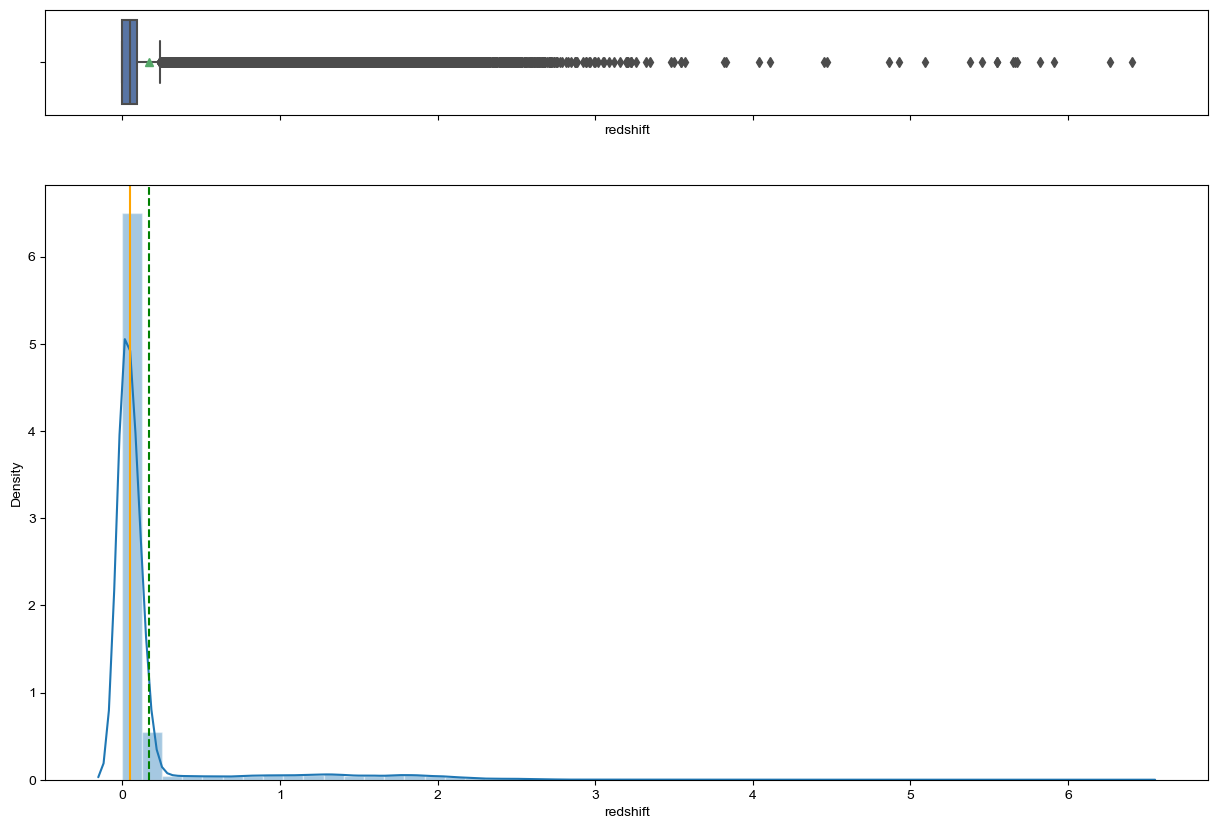

In [23]:
hist_box('redshift')

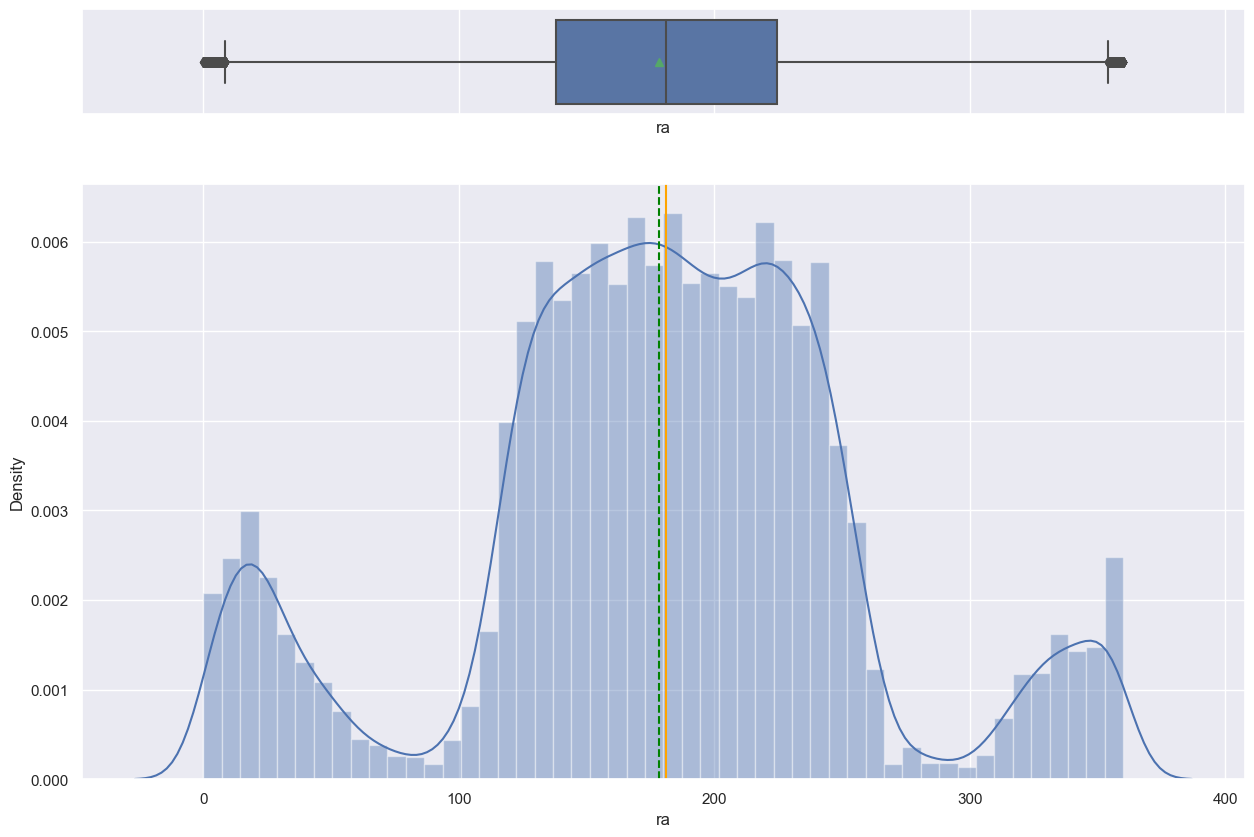

In [24]:
hist_box('ra')

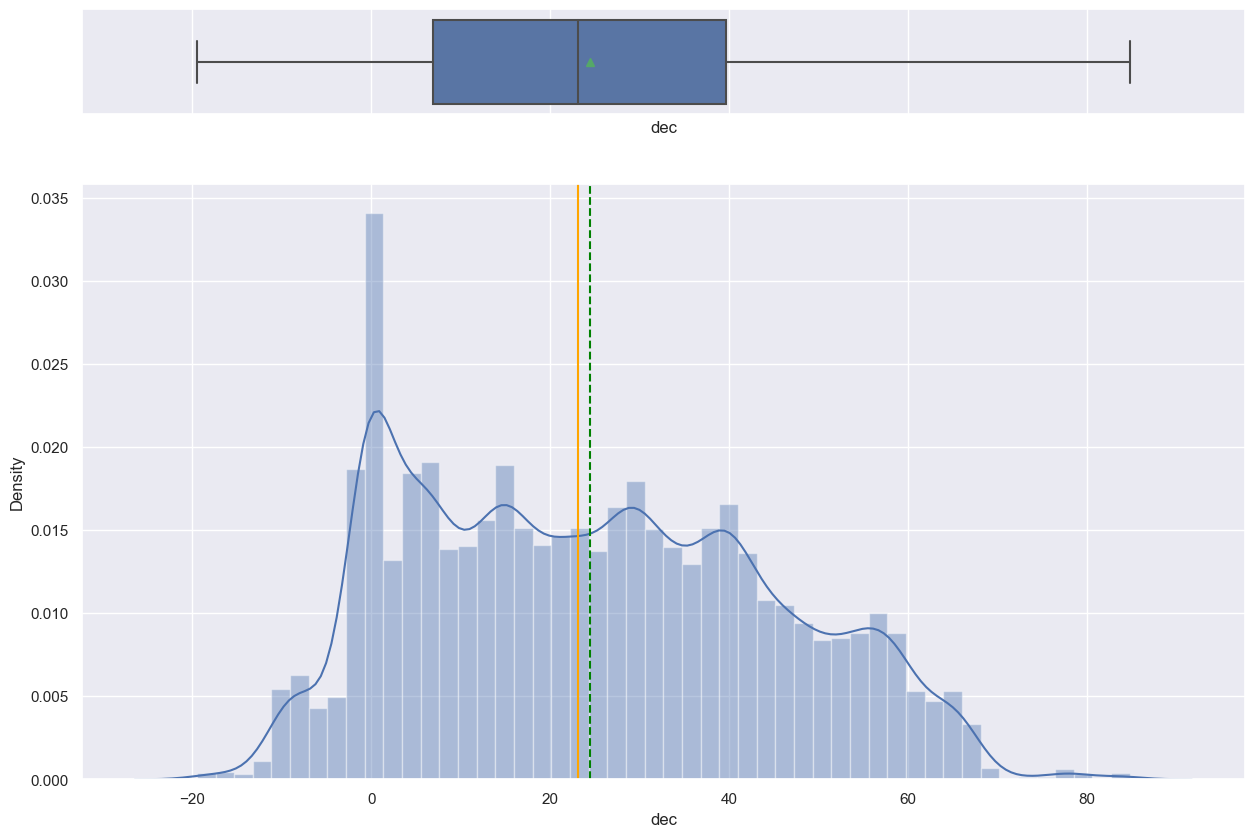

In [25]:
hist_box('dec')

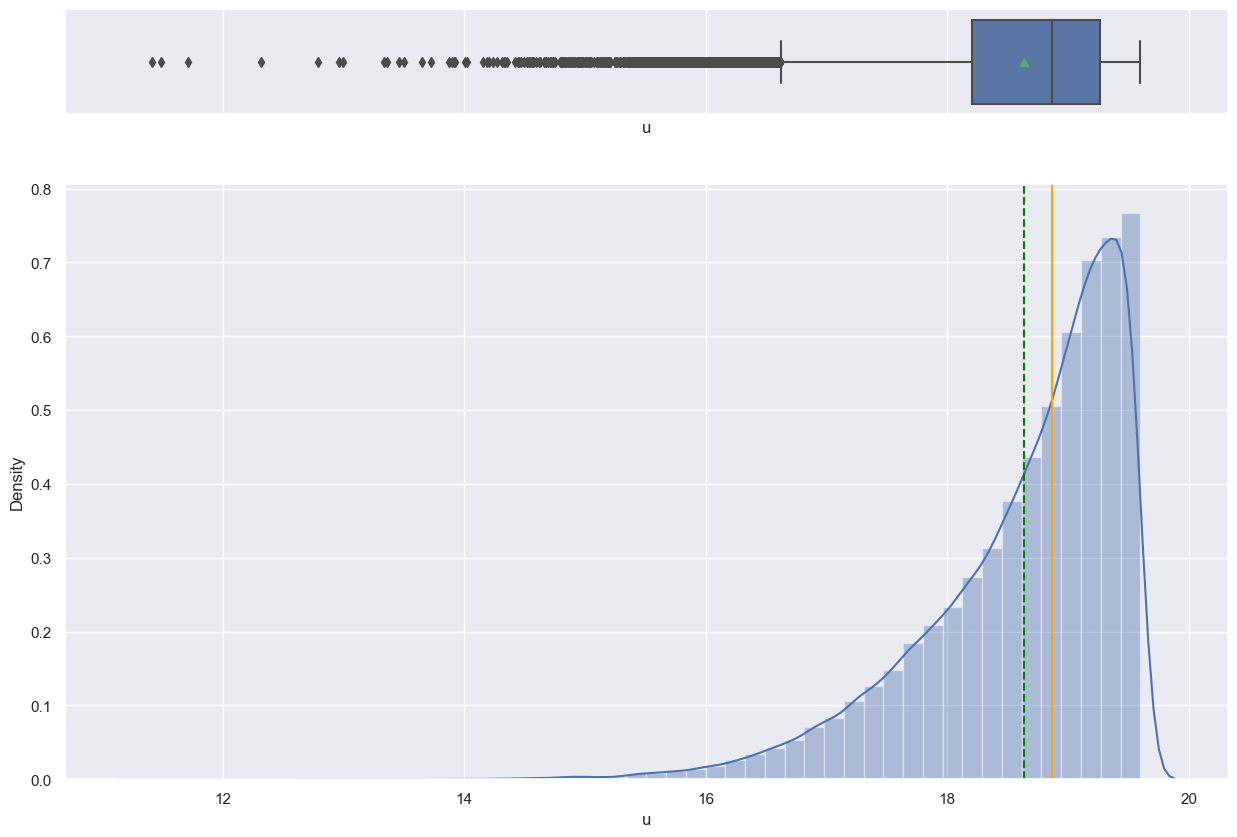

In [26]:
hist_box('u')

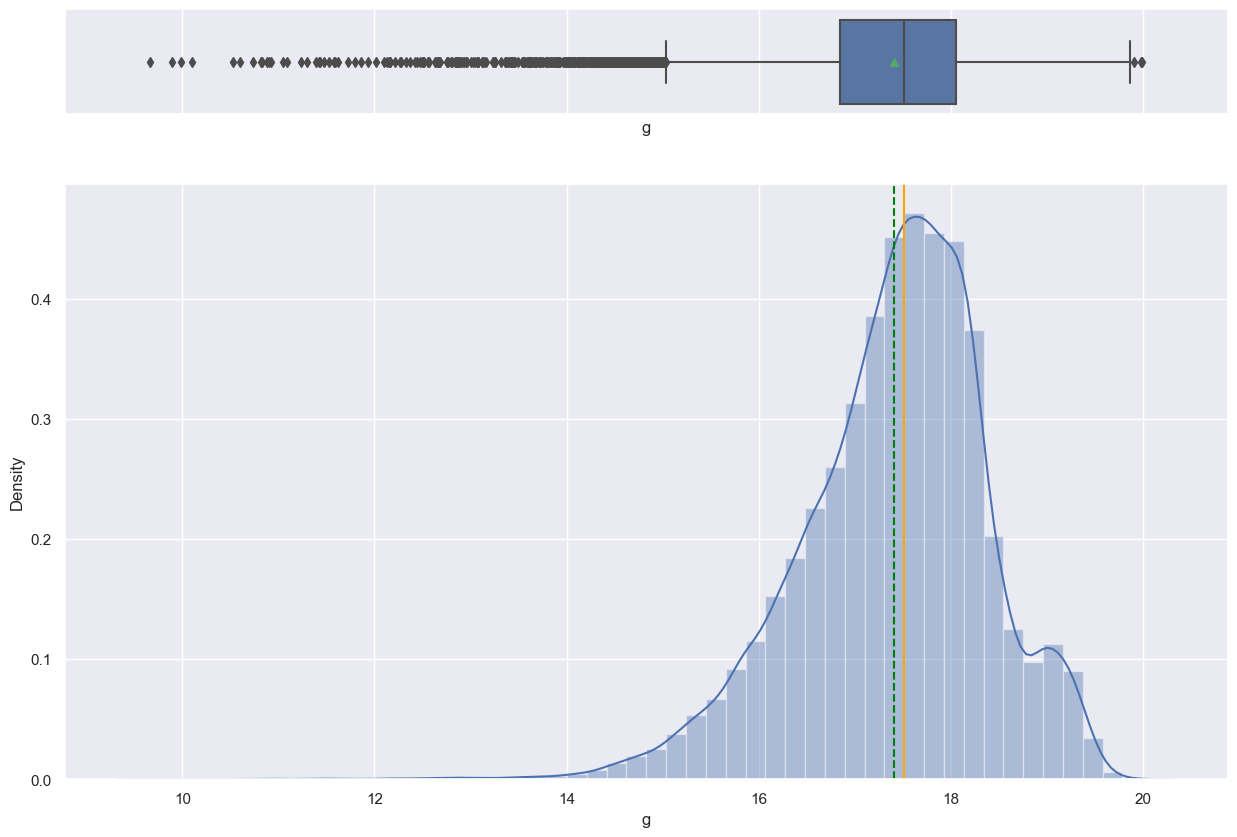

In [27]:
hist_box('g')

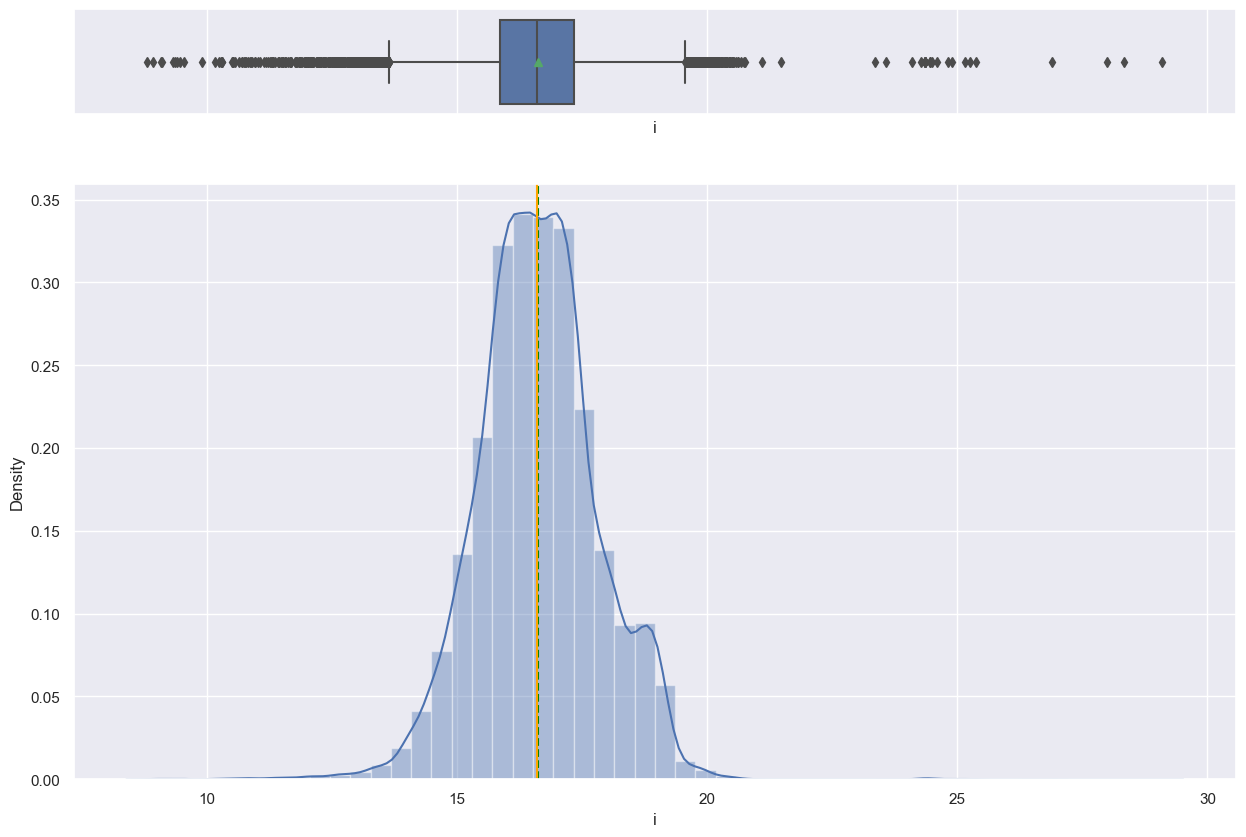

In [28]:
hist_box('i')

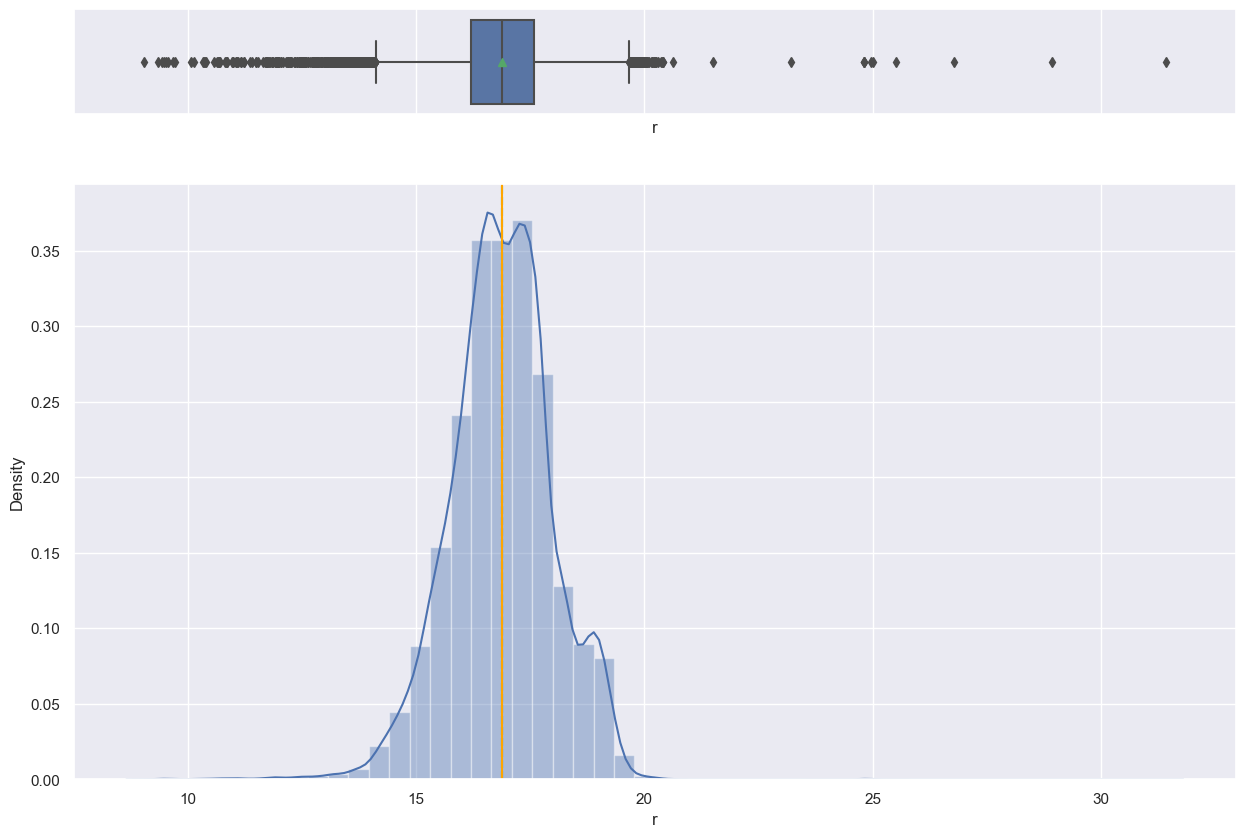

In [29]:
hist_box('r')

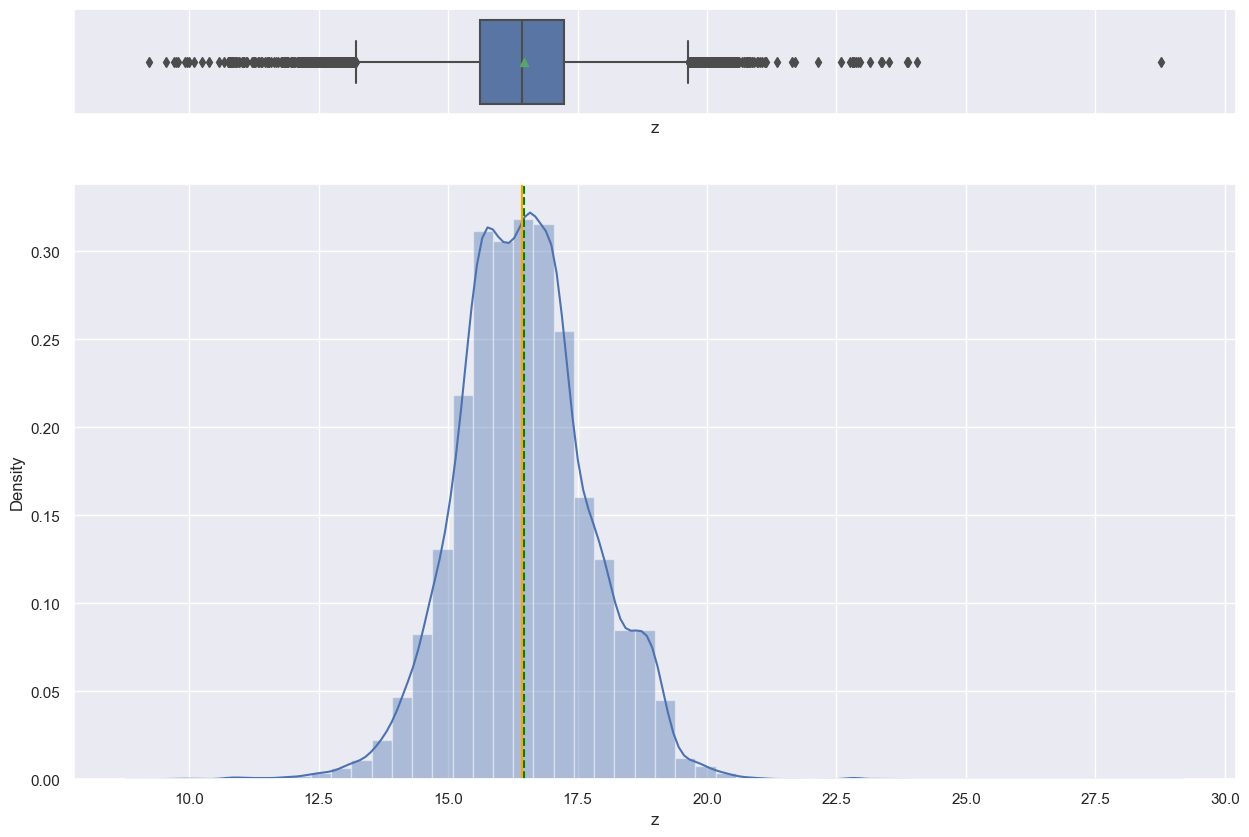

In [30]:
hist_box('z')

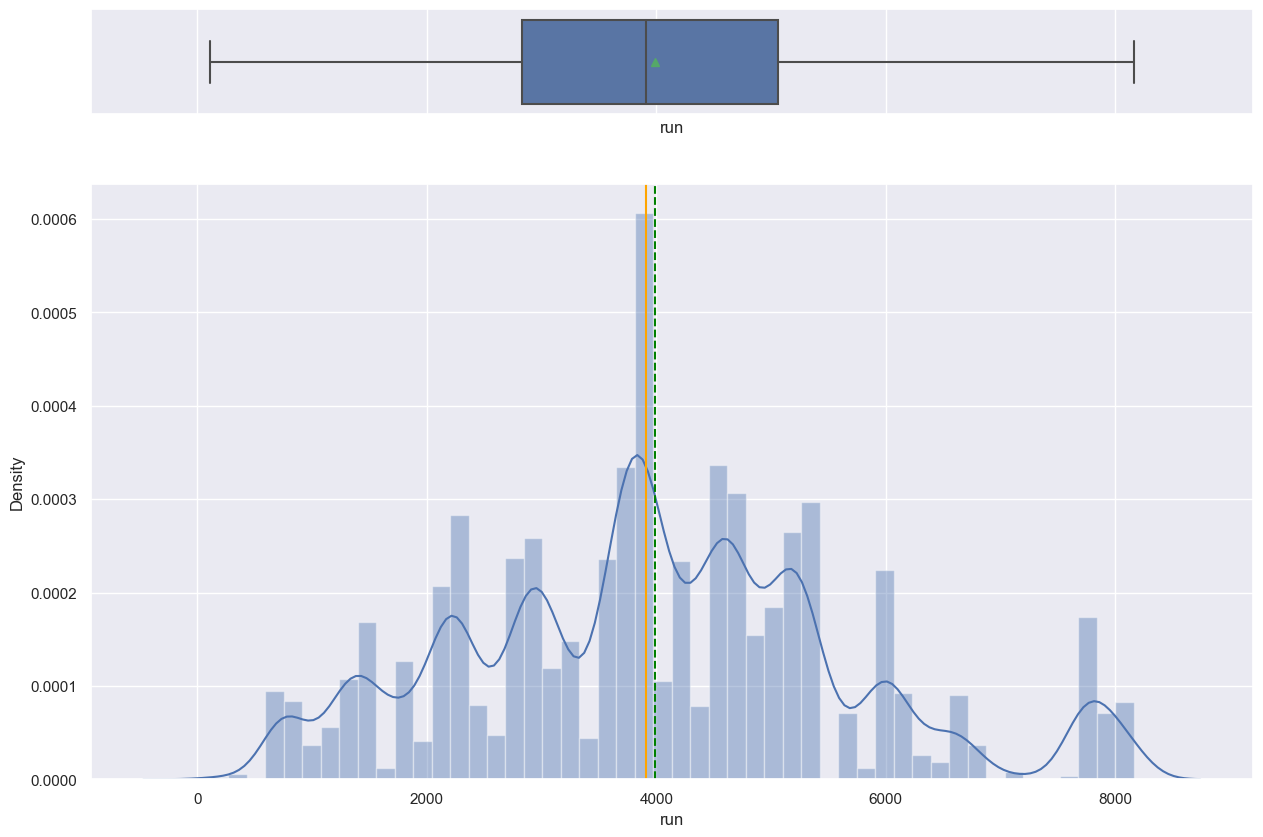

In [31]:
hist_box('run')

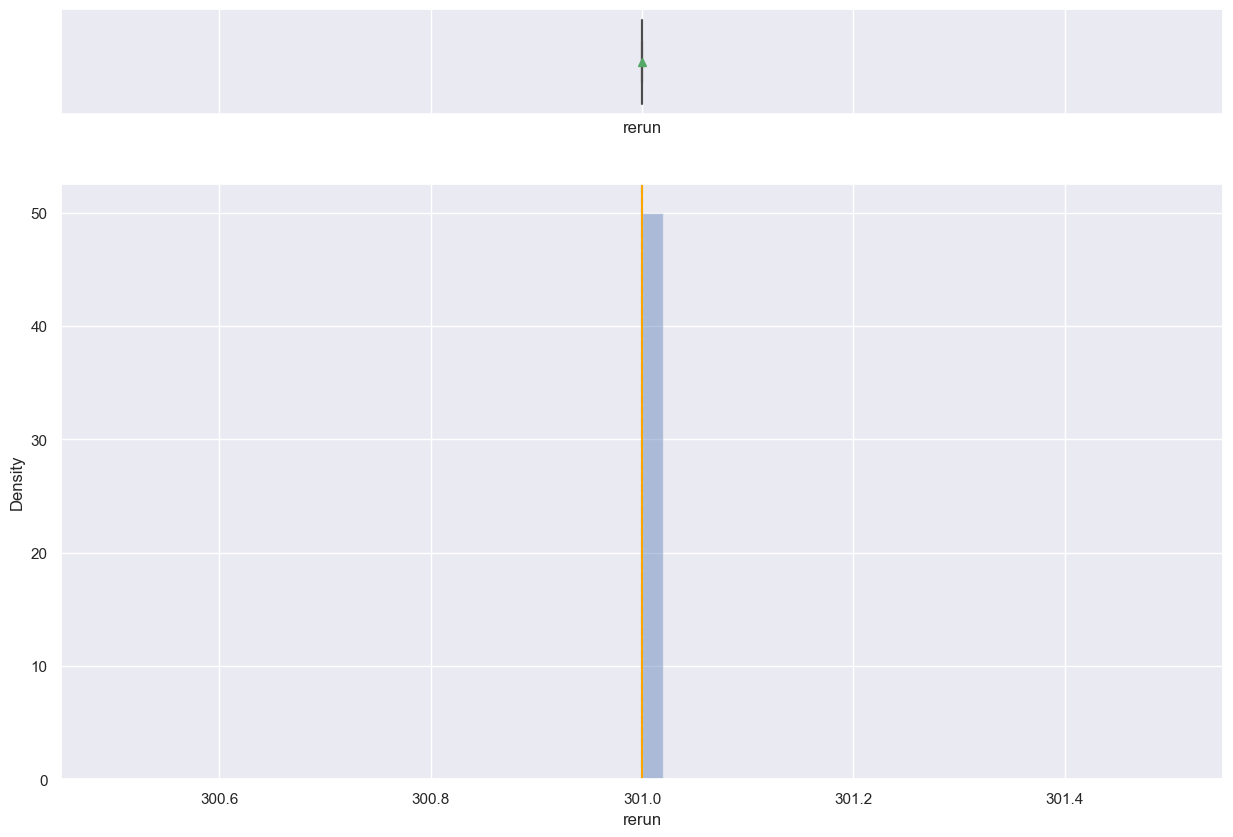

In [32]:
hist_box('rerun')

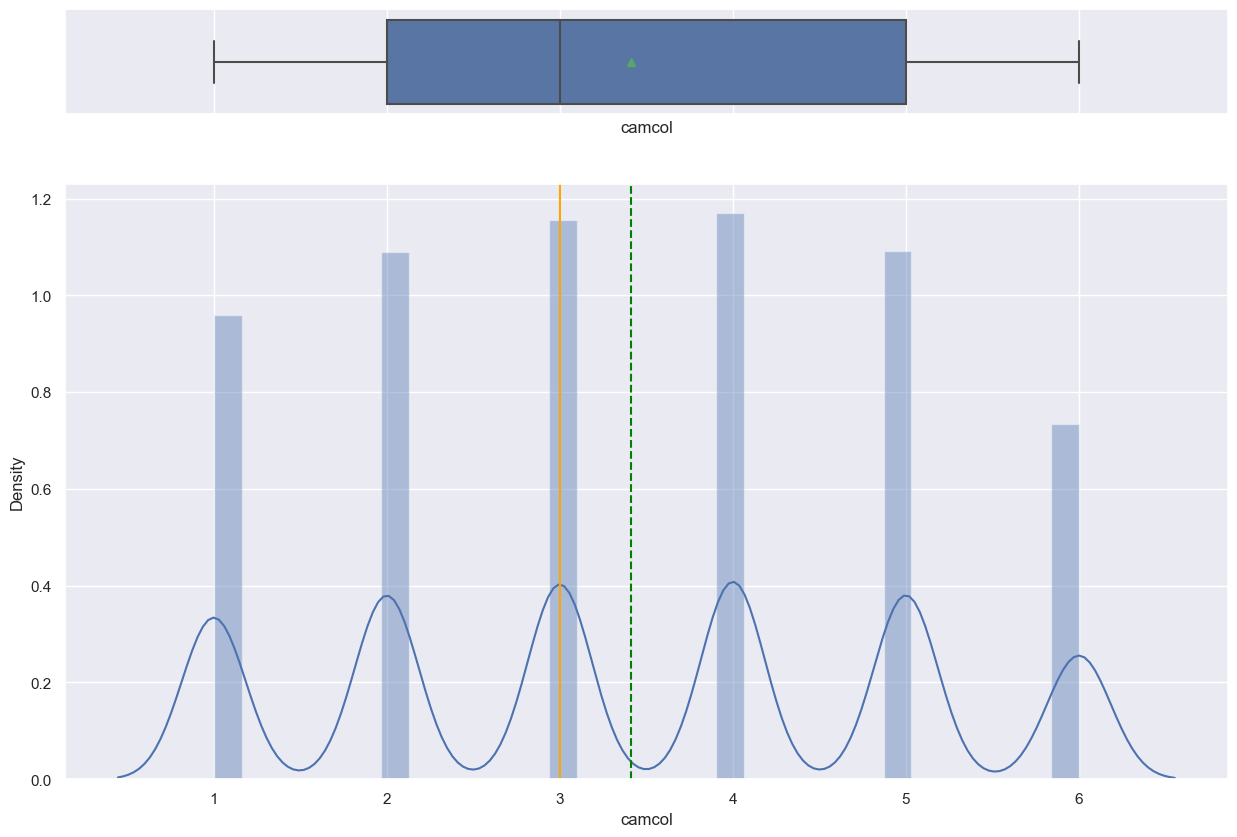

In [33]:
hist_box('camcol')

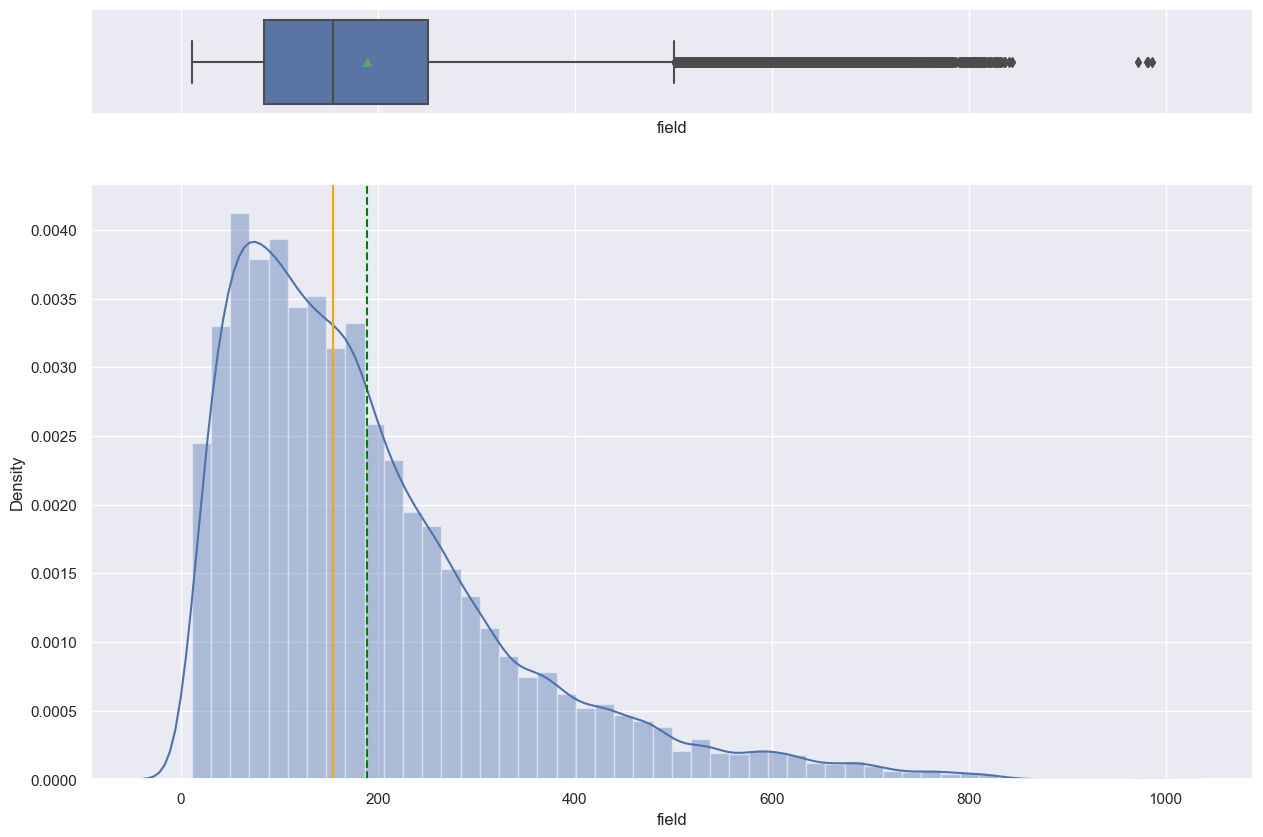

In [34]:
hist_box('field')

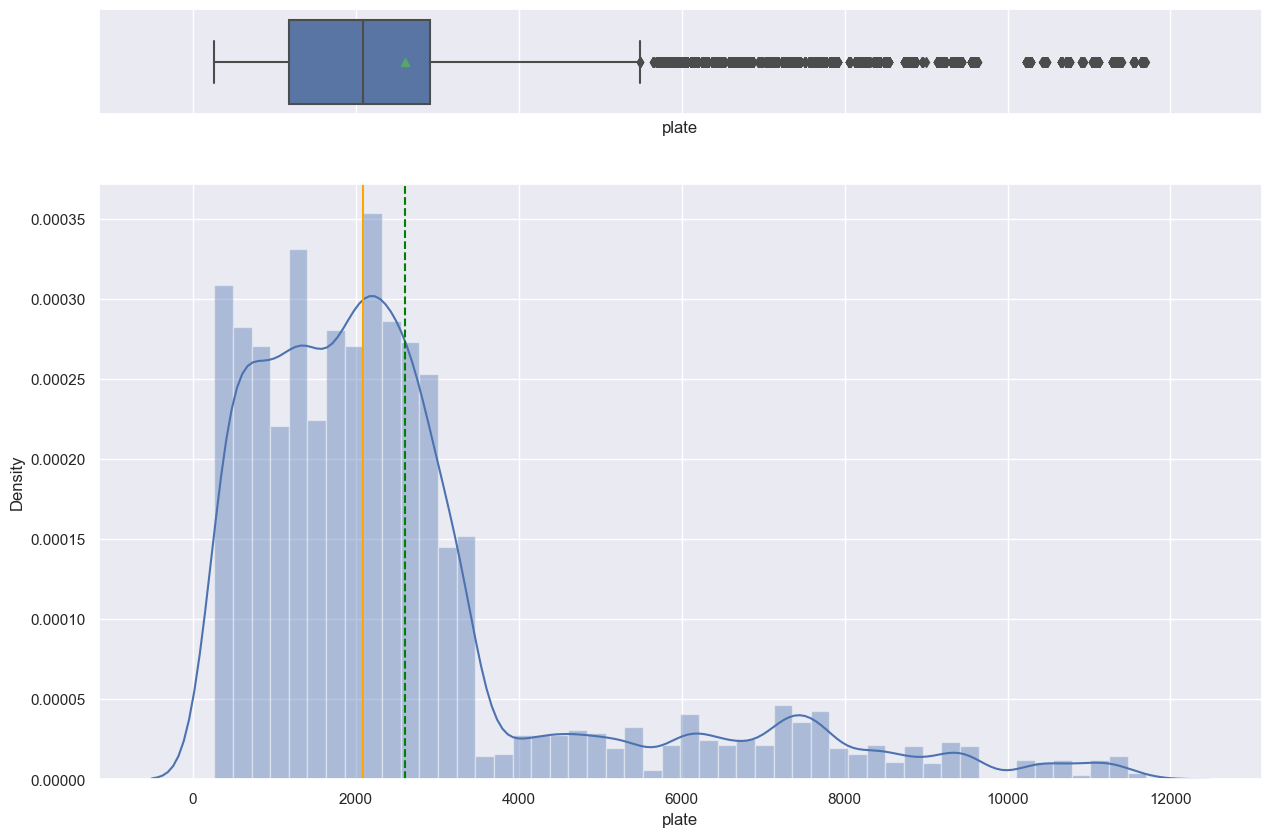

In [35]:
hist_box('plate')

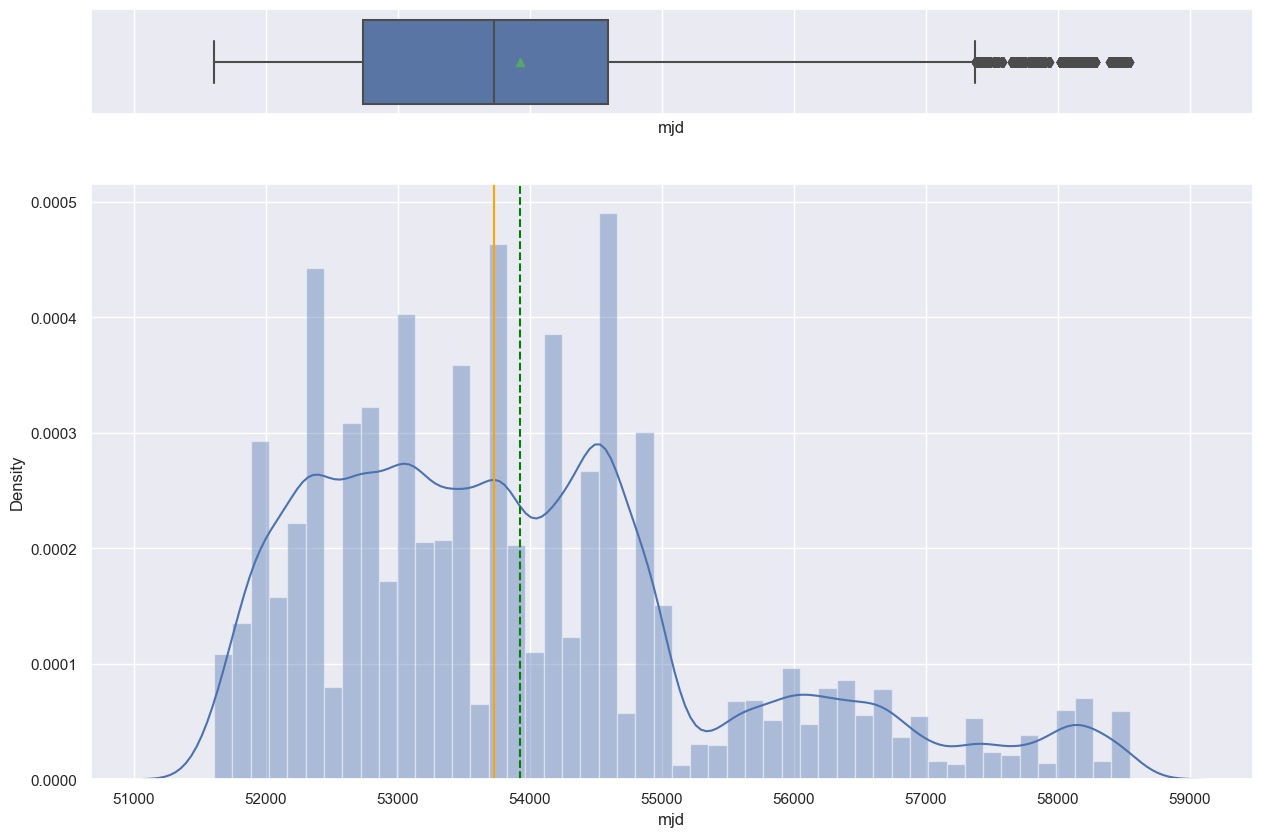

In [36]:
hist_box('mjd')

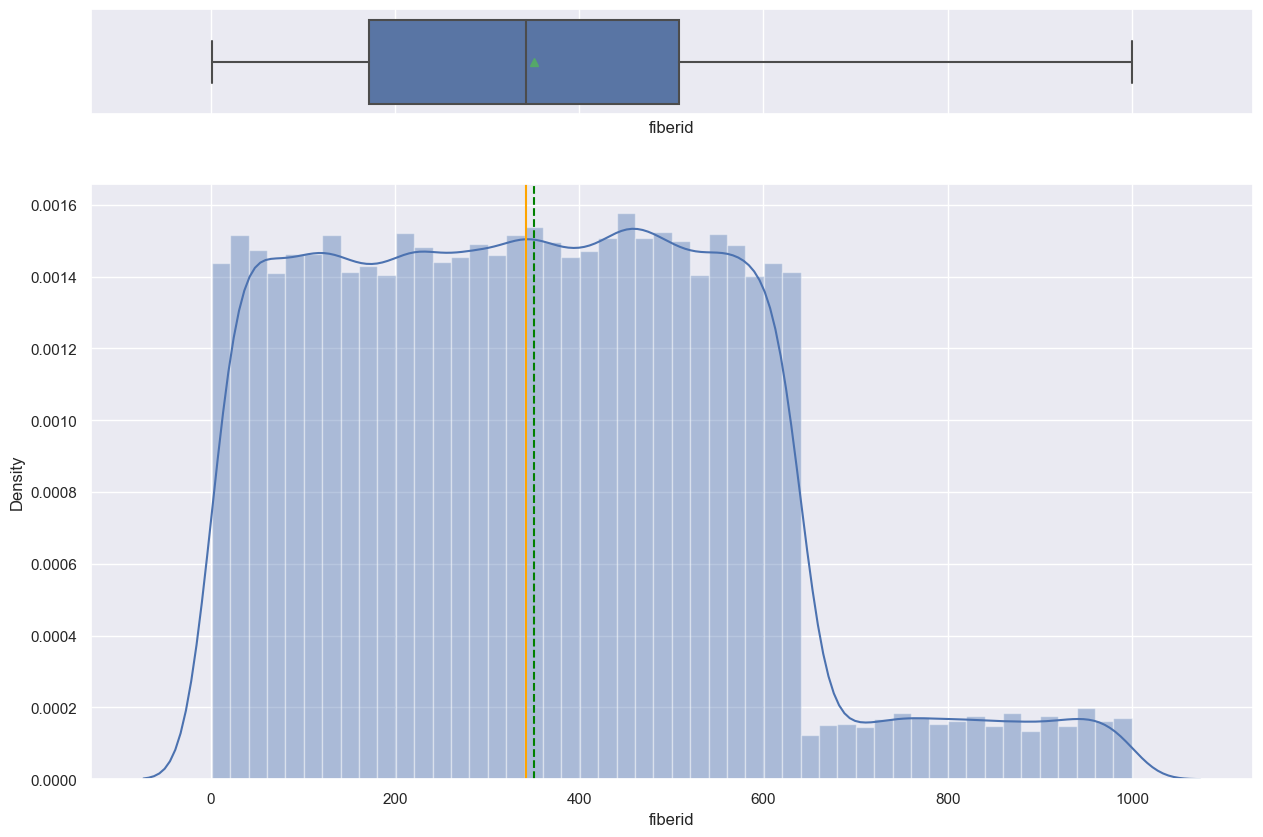

In [37]:
hist_box('fiberid')

**Observations:**
- The distribution plot shows that the plate, field, dec and redhshift variables are **right-skewed.** It is evident from the boxplots that all these variables have outliers.
- The camcol, rerun, run, fiberid and delta are the variables which do not possess outliers in the boxplot.
- rerun is the only variable which has one unique value.
- The variables x, i and r have similar distributions.
- The variables g and u are **slightly left-skewed** distributions.

### **Bivariate Analysis**

#### **Categorical and Continuous variables**

<Axes: xlabel='class', ylabel='redshift'>

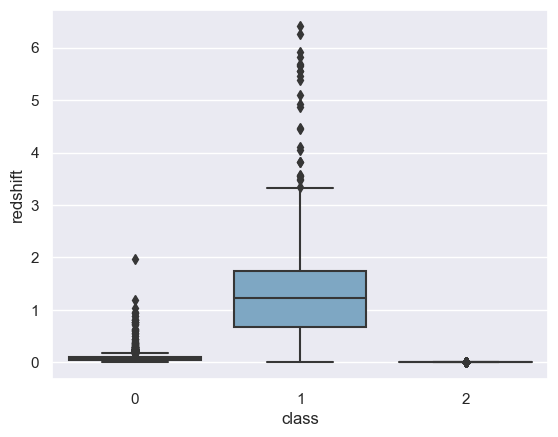

In [38]:
#class vs redshift
sns.boxplot(x=df_astro['class'],y=df_astro['redshift'],palette="PuBu")

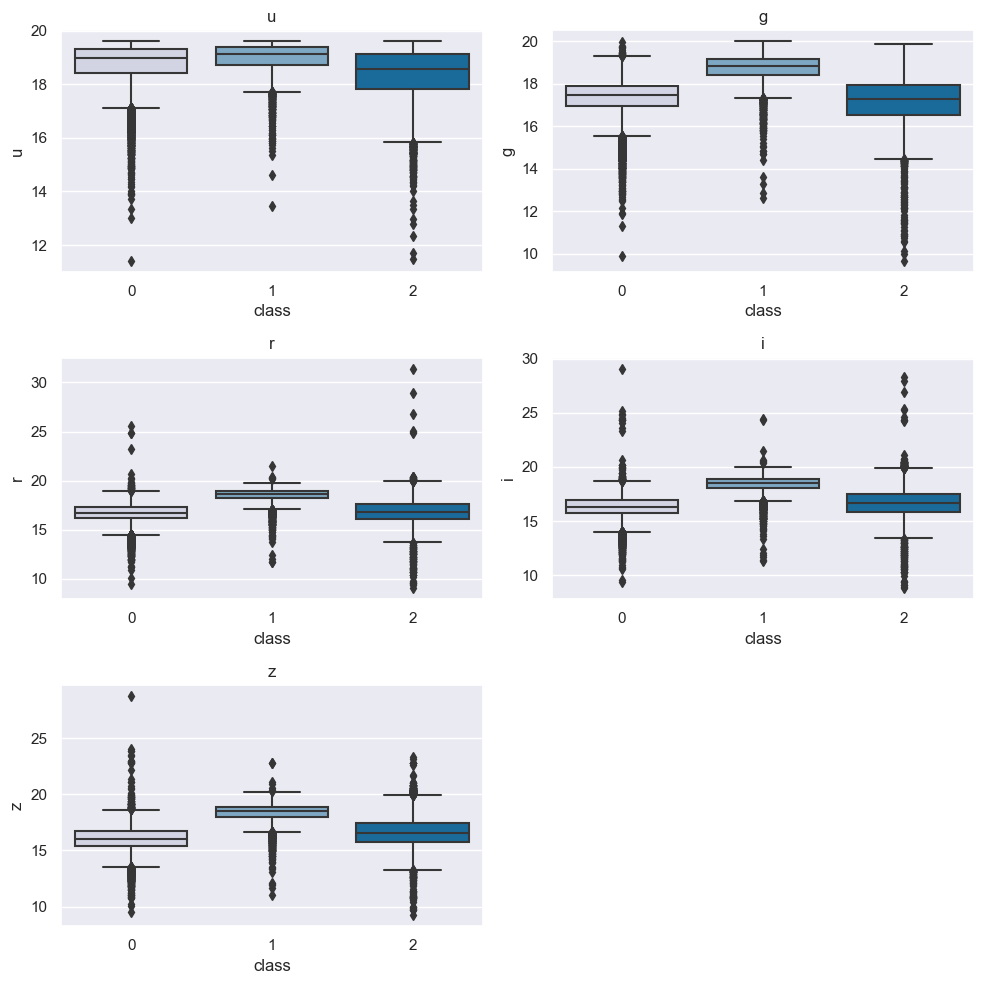

In [39]:
# class vs [u,g,r,i,z]
cols = df_astro[['u','g','r','i','z']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=df_astro["class"],y=df_astro[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

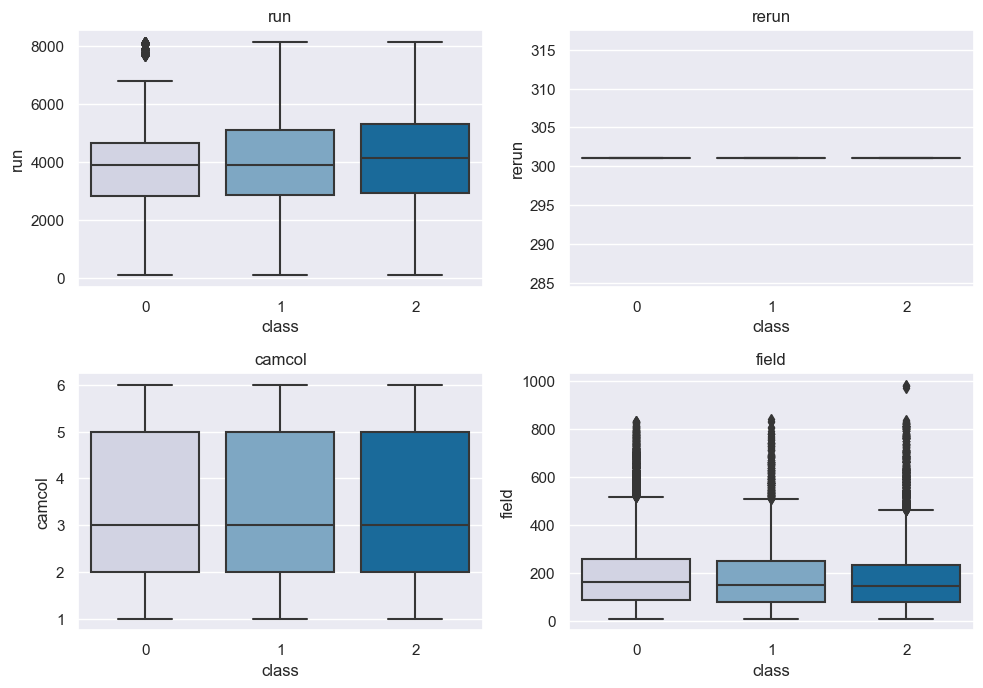

In [40]:
cols = df_astro[['run', 'rerun', 'camcol', 'field']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=df_astro["class"],y=df_astro[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

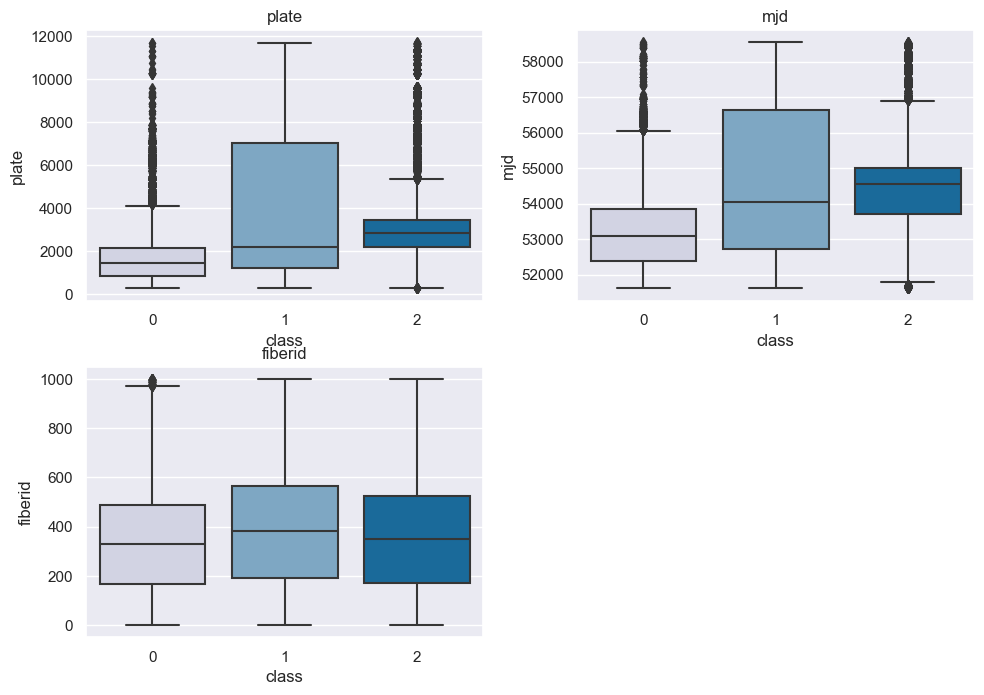

In [41]:
cols = df_astro[['plate', 'mjd', 'fiberid']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(x=df_astro["class"],y=df_astro[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

#### **kdeplot**
The kdeplot is a graph of the density of a numerical variable.

In [42]:
def plot(column):
    for i in range(3):
        sns.kdeplot(data=df_astro[df_astro["class"] == i][column], label = le.inverse_transform([i]))
    sns.kdeplot(data=df_astro[column],label = ["All"])
    plt.legend();

In [43]:
def log_plot(column):
    for i in range(3):
        sns.kdeplot(data=np.log(df_astro[df_astro["class"] == i][column]), label = le.inverse_transform([i]))
    sns.kdeplot(data=np.log(df_astro[column]),label = ["All"])
    plt.legend();

#### **rerun**

Rerun Number to specify how the image was processed

In [44]:
df_astro["rerun"].nunique()

1

Only one unique value does not help you train a predictive model, so we can drop this column.

In [45]:
df_astro = df_astro.drop("rerun",axis=1)

#### **alpha**

Right Ascension angle (at J2000 epoch)

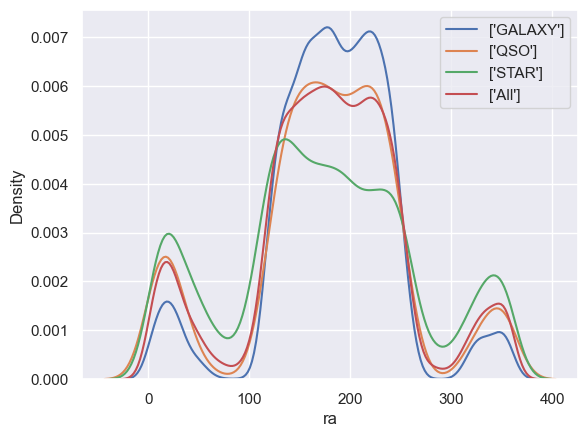

In [46]:
plot("ra")

There is not much difference in the distribution according to class, but we can see that **there are some characteristics that distinguish the STAR class here**.

#### **delta**

Declination angle (at J2000 epoch)

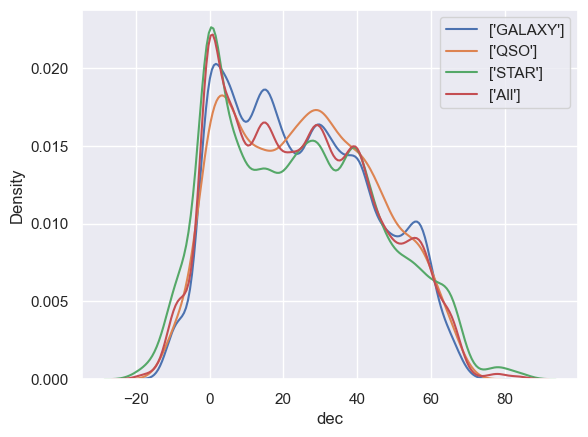

In [47]:
plot("dec")

Although there is no significant difference in distribution according to class, we can see that there are some characteristics to distinguish QSO class.

#### **r**

The red filter in the photometric system

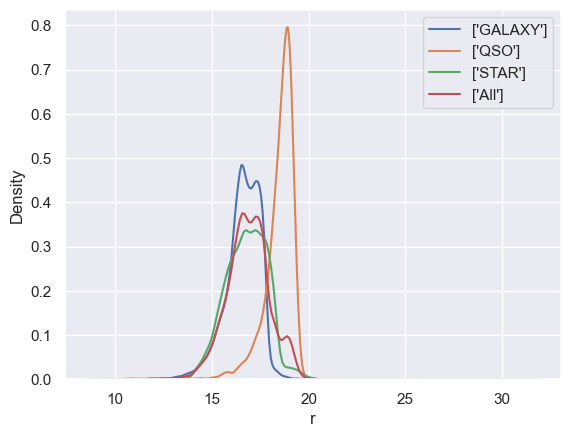

In [48]:
plot("r")

It can be seen that the distribution of the **QSO class** for this variable is characterized by a different pattern from the other categories.

#### **i**

Near Infrared filter in the photometric system

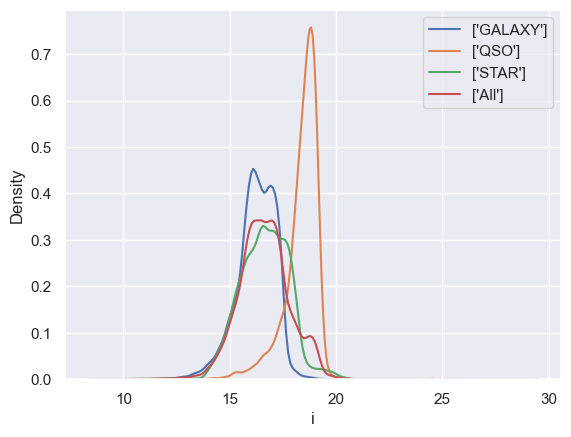

In [49]:
plot("i")

We can see that the distribution of the qso class is a little bit characteristic.

#### **run**

Run Number used to identify the specific scan

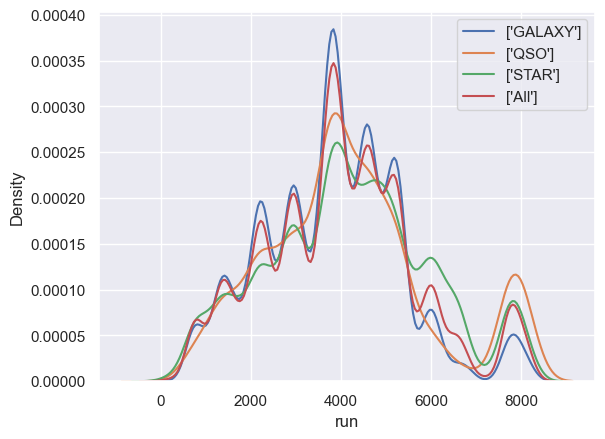

In [50]:
plot("run")

There is no significant difference in distribution by class, we can drop this column.

In [51]:
df_astro = df_astro.drop("run",axis=1)

#### **field**

Field number to identify each field

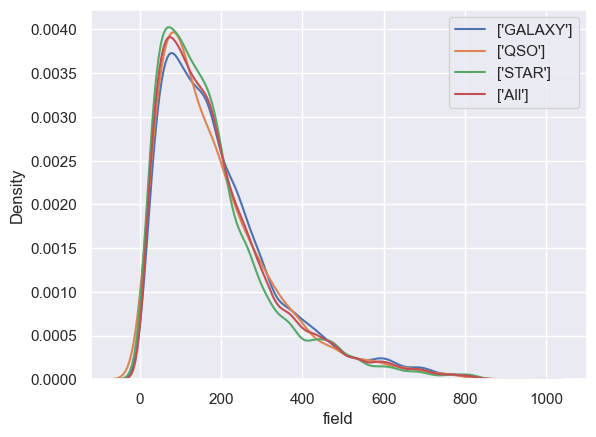

In [52]:
plot("field")

There is no significant difference in distribution by class,we can drop this column.

In [53]:
df_astro = df_astro.drop("field",axis=1)

We can see that the overall distribution has a distinct characteristic.

#### **redshift**

redshift value based on the increase in wavelength

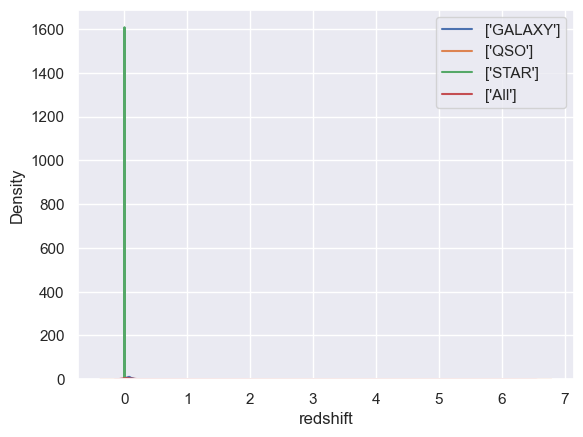

In [54]:
plot("redshift")

It is difficult to check the graph due to extreme values, so let's apply the log.

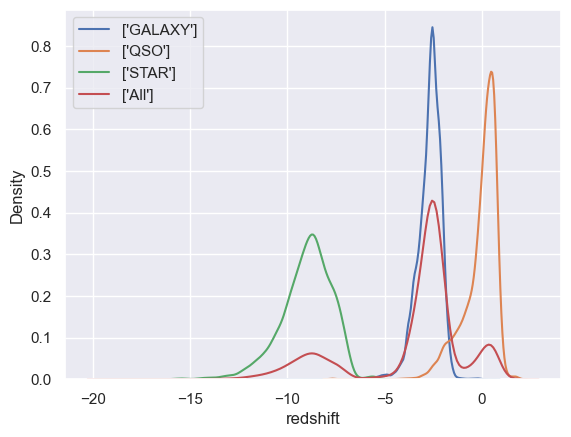

In [55]:
log_plot("redshift")

We can see that the overall distribution is characterized.

#### **plate**

plate ID, identifies each plate in SDSS

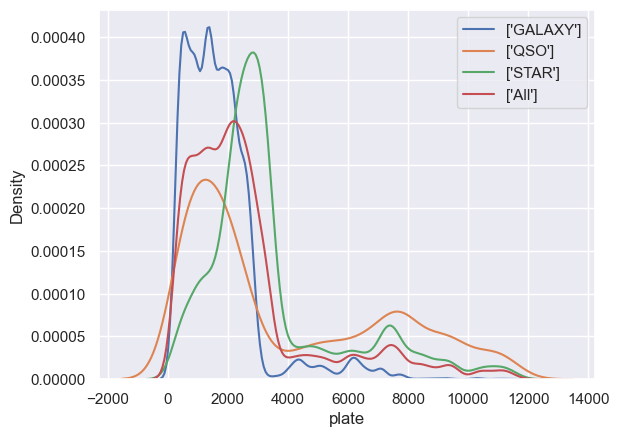

In [56]:
plot("plate")

We can see that the overall distribution has a distinct characteristic.

#### **mjd**

Modified Julian Date, used to indicate when a given piece of SDSS data was taken

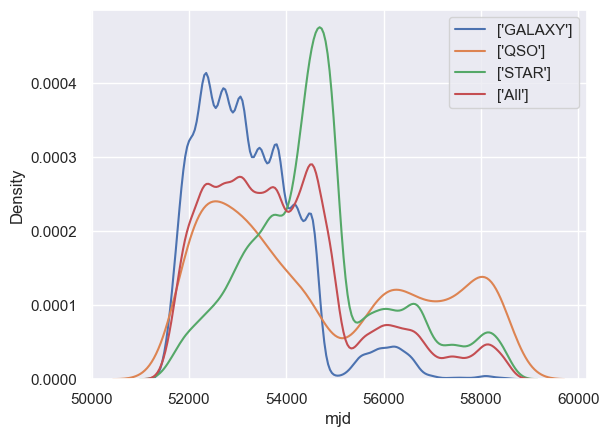

In [57]:
plot("mjd")

We can see that the overall distribution has a distinct characteristic.

#### **fiberid**

fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

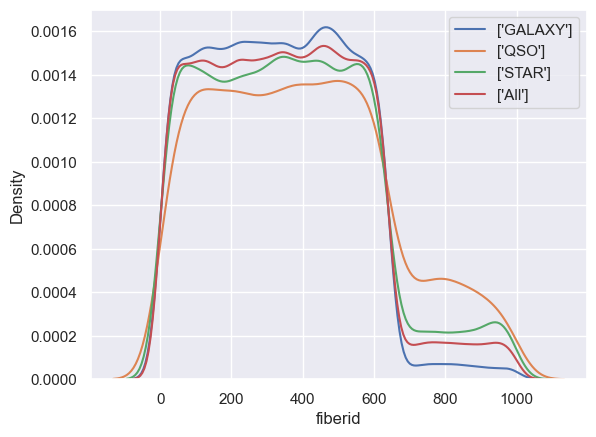

In [58]:
plot("fiberid")

There is no significant difference in distribution by class. We can drop this column.

In [59]:
df_astro = df_astro.drop("fiberid",axis=1)

#### **camcol**

Camera column to identify the scanline within the run

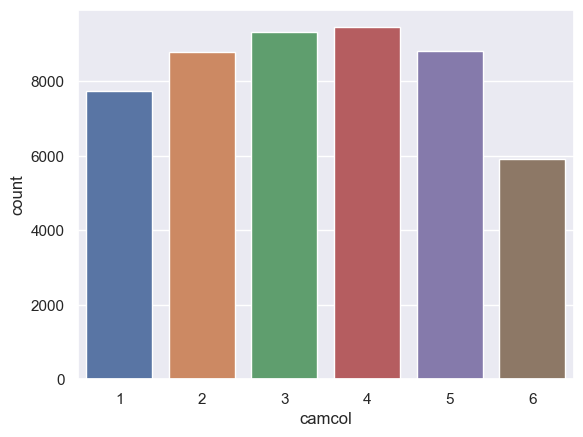

In [60]:
sns.countplot(x=df_astro["camcol"]);

We can see that cam_col is distributed evenly.

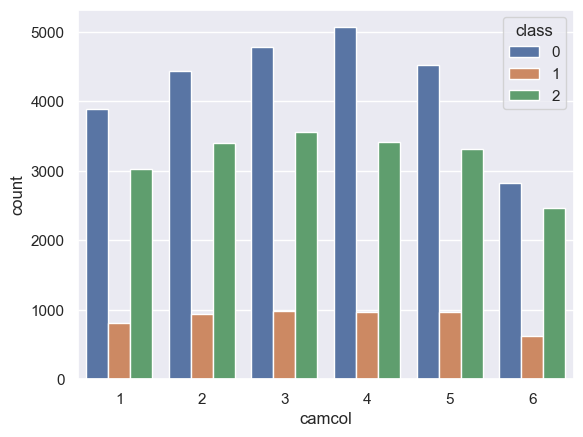

In [61]:
sns.countplot(x=df_astro["camcol"],hue=df_astro["class"]);

It seems difficult to distinguish the class according to cam_col, we can drop this column.

In [62]:
df_astro = df_astro.drop("camcol",axis=1)

#### **class**

object class (galaxy, star or quasar object)

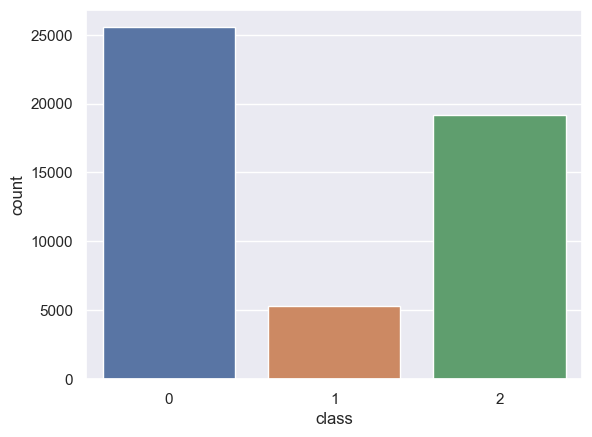

In [63]:
sns.countplot(x=df_astro["class"]);

We can see that the distribution of class is unbalanced.

### **Multivariate Analysis**

**Pairwise Correlation**

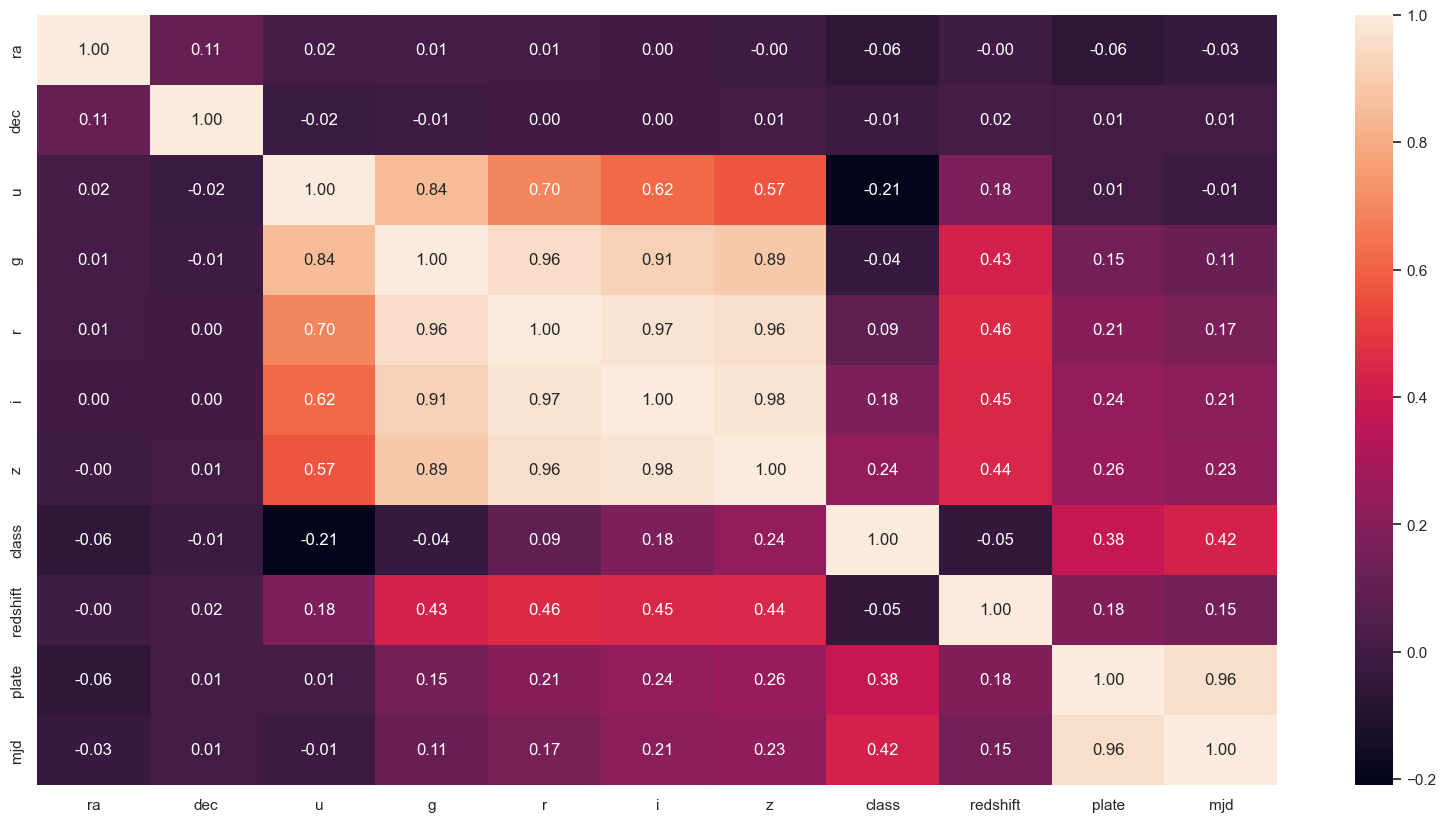

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(df_astro.corr(numeric_only=True),annot=True,fmt=".2f")
plt.show()

**Observations:**
- We can see a **high positive correlation** among the following variables: 
    1. z and g
    2. mjd and plate
    3. z and r
    4. z and i
    5. i and g
    6. i and r
    7. r and g


<br/>  
- The i and g are highly correlated, g and r are highly correlated and r and z are highly correlated.
- There is a negative correlation between redshift and class variables. The **redshift** is clearly going to be a highly influential feature in determining the class of the celestial object.


## **Data Preparation**

In [65]:
# Separating the dependent and independent columns in the dataset
X = df_astro.drop(['class'], axis=1);
Y = df_astro[['class']];

In [66]:
df_astro[['class']]

,class
240208,2
18744,0
207175,0
18669,0
189086,2
...,...
12026,0
101461,2
146611,1
152140,0


In [67]:
# Splitting the dataset into the Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y);

# Checking the shape of the Train and Test sets
print('X Train Shape:', X_train.shape);
print('X Test Shape:', X_test.shape);
print('Y Train Shape:', y_train.shape);
print('Y Test Shape:', y_test.shape);

X Train Shape: (45000, 10)
X Test Shape: (5000, 10)
Y Train Shape: (45000, 1)
Y Test Shape: (5000, 1)


## **Model Building**

In [68]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted));
    cm = confusion_matrix(actual, predicted);
    plt.figure(figsize = (8,5));
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Galaxy', 'Quasar', 'Star'], yticklabels = ['Galaxy', 'Quasar', 'Star'])
    plt.ylabel('Actual'); plt.xlabel('Predicted');
    plt.show()

### **The k-Nearest Neighbors Model**

#### **Before Scaling and PCA**

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22983
           1       0.78      0.51      0.62      4751
           2       0.91      0.81      0.85     17266

    accuracy                           0.86     45000
   macro avg       0.84      0.76      0.79     45000
weighted avg       0.86      0.86      0.85     45000



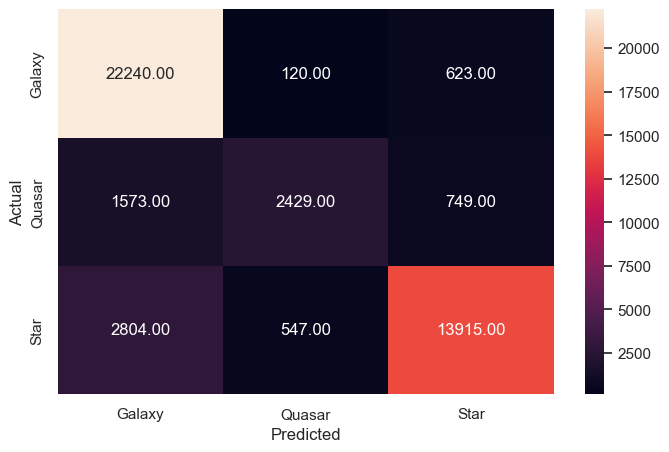

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()
knn_model.fit(X_train,y_train)
knn_train_predictions = knn_model.predict(X_train)
metrics_score(y_train,knn_train_predictions)

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2554
           1       0.59      0.35      0.44       528
           2       0.87      0.77      0.81      1918

    accuracy                           0.81      5000
   macro avg       0.75      0.69      0.71      5000
weighted avg       0.81      0.81      0.80      5000



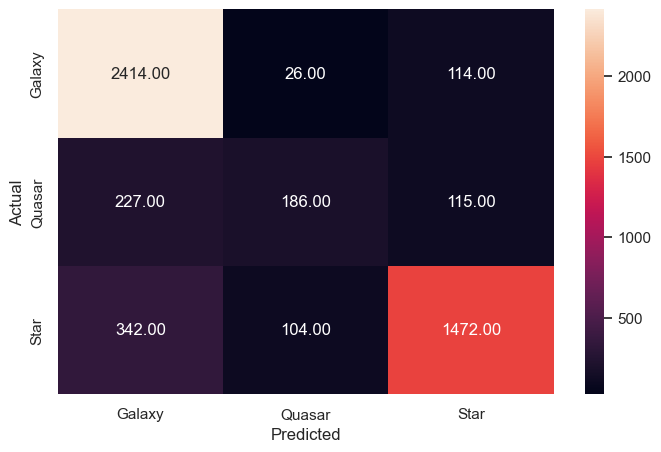

In [70]:
y_test_pred_knn = knn_model.predict(X_test);
metrics_score(y_test, y_test_pred_knn)

#### **After Scaling and PCA**

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     22983
           1       0.99      0.93      0.96      4751
           2       0.96      0.94      0.95     17266

    accuracy                           0.95     45000
   macro avg       0.96      0.95      0.95     45000
weighted avg       0.95      0.95      0.95     45000



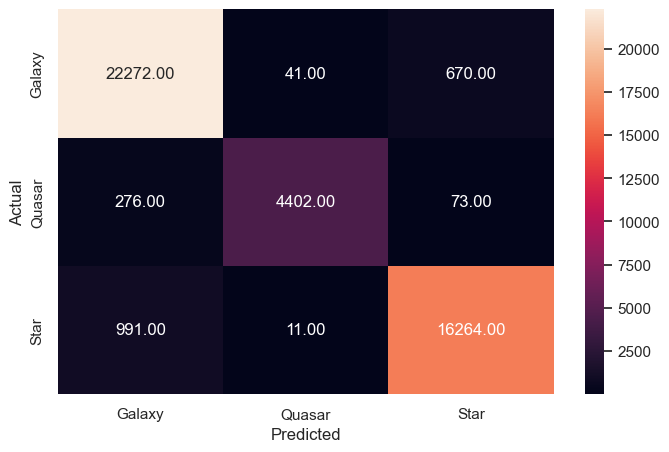

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)
knn_model= KNeighborsClassifier()
knn_model.fit(X_train_pca,y_train)
knn_train_predictions = knn_model.predict(X_train_pca)
metrics_score(y_train,knn_train_predictions)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2554
           1       0.99      0.89      0.94       528
           2       0.81      0.85      0.83      1918

    accuracy                           0.86      5000
   macro avg       0.89      0.86      0.88      5000
weighted avg       0.86      0.86      0.86      5000



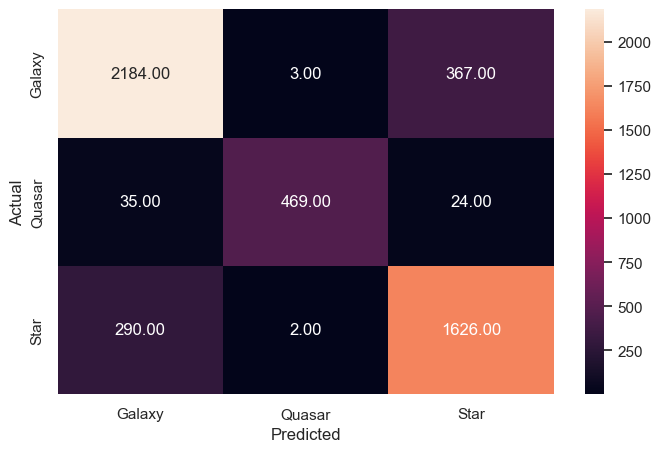

In [72]:
y_test_pred_knn = knn_model.predict(X_test_pca);
metrics_score(y_test, y_test_pred_knn)

**Observations:**

While the performance of the k-Nearest Neighbors algorithm on the test dataset was quite good, it doesn't achieve the 90%+ accuracies and F1-scores we expect from a high-performing Machine Learning model on this dataset, and there is clear scope for improvement there.

In addition, k-Nearest Neighbors also does not computationally scale well with a large amount of data, and can be infeasible to run on big datasets. For these reasons, we need a more efficient and elegant algorithm that is capable of non-linear classification, and we can turn to **Decision Trees** for that.

### **Tree-Based Models**

### **The Decision Tree Classifier**

### **Before Scaling**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22983
           1       1.00      1.00      1.00      4751
           2       1.00      1.00      1.00     17266

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



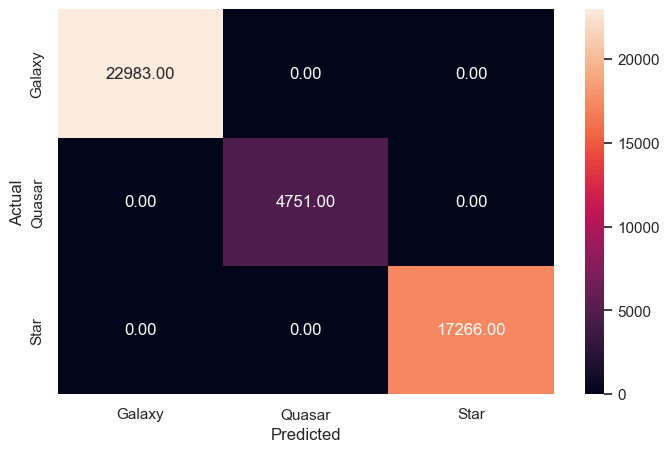

In [73]:
dt = DecisionTreeClassifier(random_state=1);
dt.fit(X_train, y_train)
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2554
           1       0.94      0.95      0.95       528
           2       1.00      1.00      1.00      1918

    accuracy                           0.99      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.99      0.99      0.99      5000



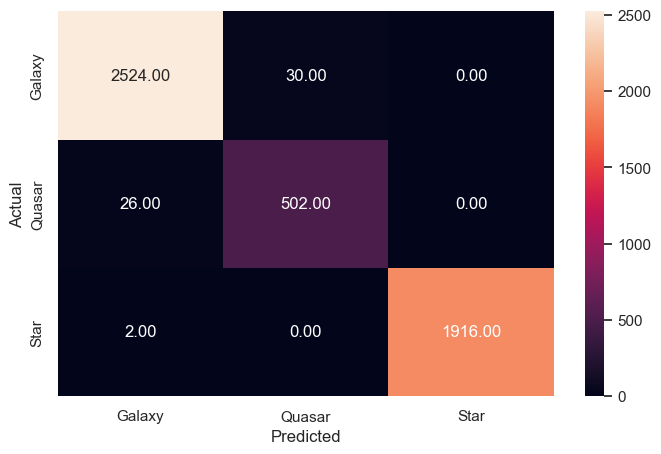

In [74]:
y_test_pred_dt = dt.predict(X_test);
metrics_score(y_test, y_test_pred_dt)

### **Model Evaluation using K-Fold Cross Validation**

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_test, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

The average score of the model with K-5 Cross validation is 0.9836 


### **After Scaling**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22983
           1       1.00      1.00      1.00      4751
           2       1.00      1.00      1.00     17266

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



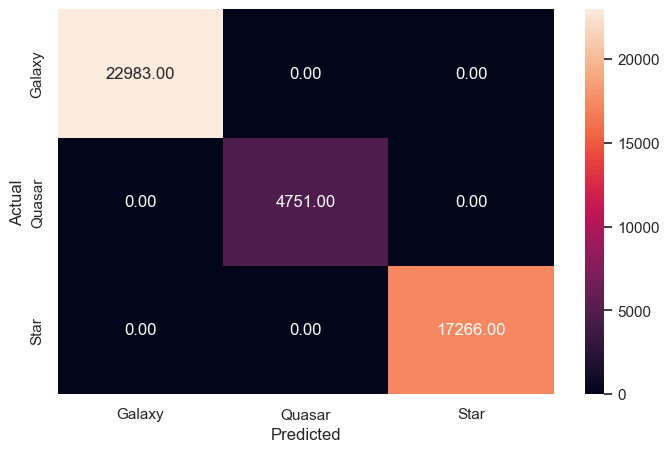

In [76]:
dt = DecisionTreeClassifier(random_state=1);
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
dt.fit(X_train_std, y_train)
y_train_pred_dt = dt.predict(X_train_std)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2554
           1       0.96      0.93      0.94       528
           2       0.99      0.85      0.92      1918

    accuracy                           0.93      5000
   macro avg       0.94      0.92      0.93      5000
weighted avg       0.93      0.93      0.93      5000



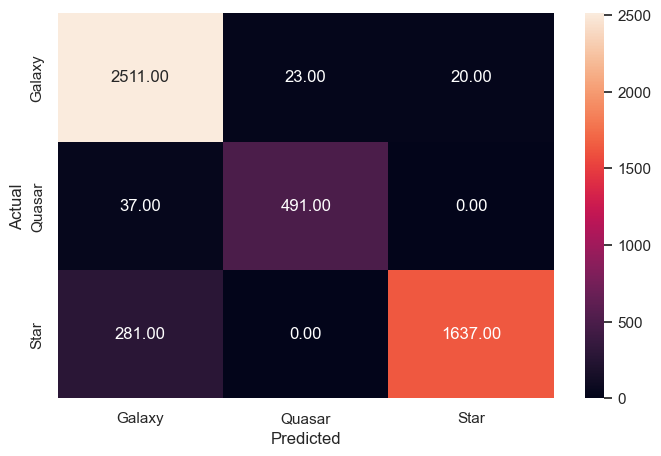

In [77]:
y_test_pred_dt = dt.predict(X_test_std);
metrics_score(y_test, y_test_pred_dt)

As expected, **scaling doesn't make much of a difference in the performance of the Decision Tree model**, since it is not a distance-based algorithm and rather tries to separate instances with orthogonal splits in vector space.

### **Model Evaluation using K-Fold Cross Validation**

In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_test_std, y_test, cv=5)
print(f"The average score of the model with K-5 Cross validation is {np.average(scores)} ")

The average score of the model with K-5 Cross validation is 0.9836 


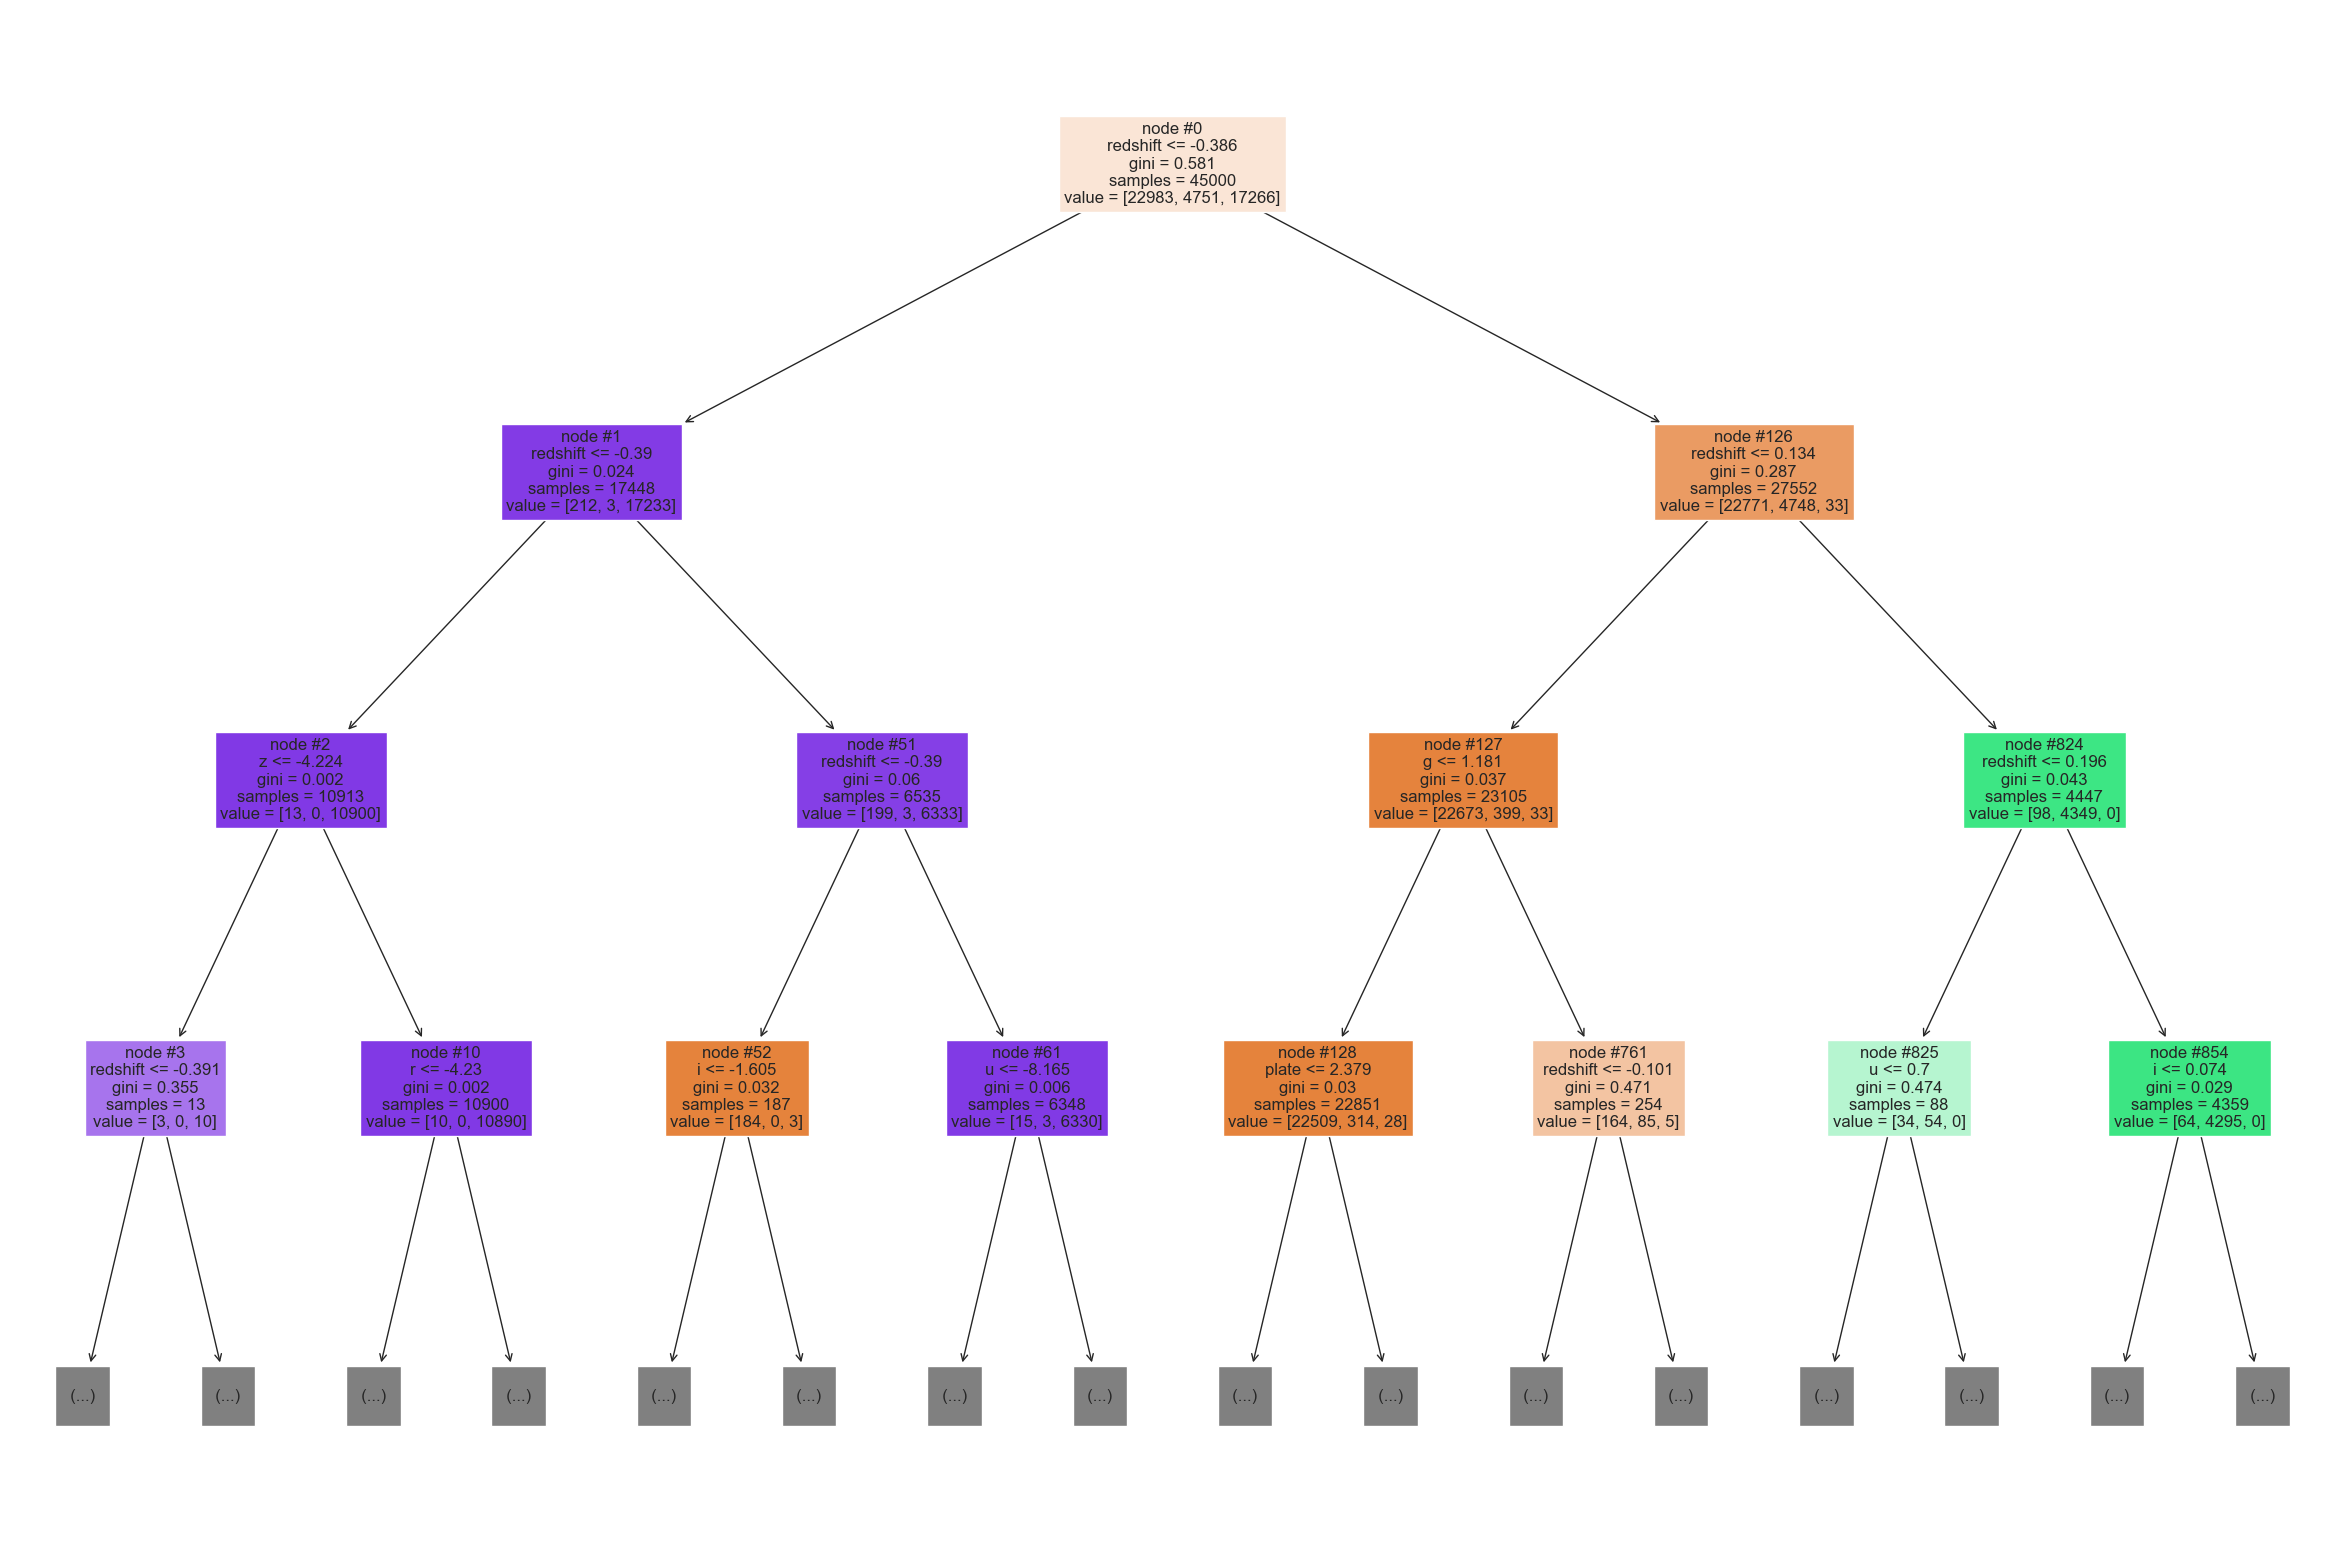

In [79]:
features = list(X.columns)
plt.figure(figsize=(30,20))
tree.plot_tree(dt, max_depth=3, feature_names=features, filled=True, fontsize=12, node_ids=True, class_names=None);
plt.show()

**Observation:**

- **The first split in the decision tree is at the redshift feature**, which implies that it is clearly the most important factor in deciding the class of the celestial object.
- While this may be common knowledge in astronomy, the fact that our model is able to provide this domain-specific knowledge purely from the data, without us having any background in the field, is a hint towards the value of Machine Learning and Data Science.

### **Feature importance**

**Let's look at the feature importance** of the decision tree model

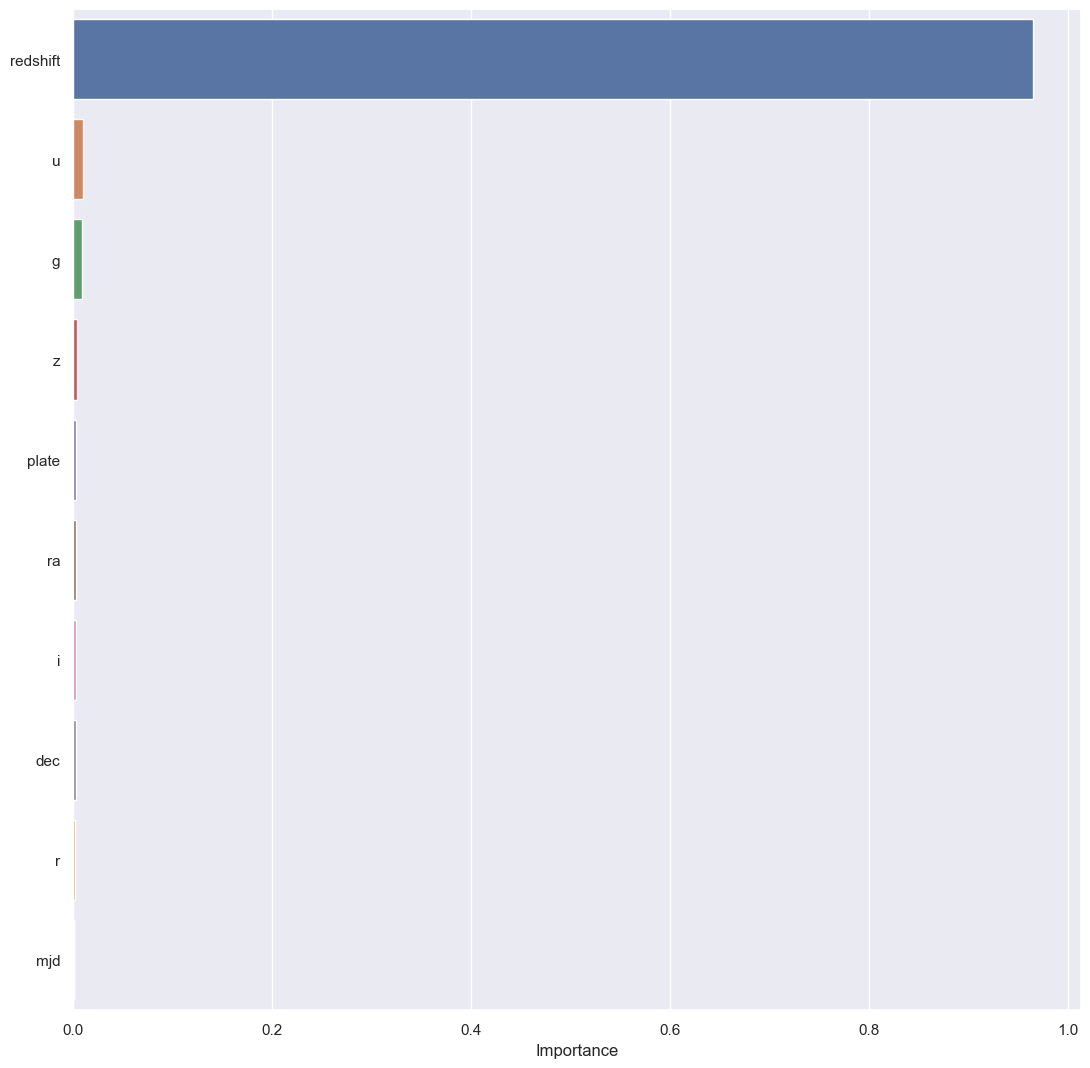

          Importance
redshift     0.96467
u            0.00958
g            0.00894
z            0.00403
plate        0.00258
ra           0.00254
i            0.00247
dec          0.00234
r            0.00183
mjd          0.00103


In [80]:
# Plotting the feature importance
importances = dt.feature_importances_
columns = X.columns;
importance_df_astro = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False);
plt.figure(figsize=(13,13));
sns.barplot(x=importance_df_astro.Importance,y= importance_df_astro.index)
plt.show()

print(importance_df_astro)

- The **Redshift** is an important variable with a high significance when compared to other variables.


## **Conclusions and Recommendations**

#### **Algorithmic Insights**

- It is apparent from the efforts above that **there are some advantages with Decision Trees** when it comes to non-linear modeling and classification, to obtain a mapping from input to output. 
- Decision Trees are simple to understand and explain, and **they mirror the human pattern of if-then-else decision making.** They are also more computationally efficient than kNN.
- These advantages are what enable them to outperform the k-Nearest Neighbors algorithm, which is also known to be a popular non-linear modeling technique.

#### **Dataset Insights**
- From a dataset perspective, the fact that the **redshift** variable is clearly the most important feature in determining the class of a celestial object, makes it **tailor-made for a Decision Tree's hierarchical nature of decision-making**. As we see in the case study, the Decision Tree prioritizes that feature as the root node of decision splits before moving on to other features.
- Another potential reason for the improved performance of the Decision Tree on this dataset may have to do with the nature of the observations. In astronomical observations such as these, the value ranges of the features of naturally occurring objects such as stars, galaxies, and quasars should, for the most part, lie within certain limits outside of a few exceptions. Those exceptions would be difficult to detect purely through the values of the neighbors of that datapoint in vector space, and would rather need to be detected through fine orthogonal decision boundaries. This nuanced point could be the reason why Decision Trees perform relatively better on this dataset.
- Although there are more advanced ML techniques that use an ensemble of Decision Trees, such as Random Forests and Boosting methods, they are computationally more expensive, and **the 90%+ performance of Decision Trees means they would be our first recommendation to an astronomy team** looking to use this Machine Learning model purely as a second opinion to make quick decisions on Celestial Object Detection.